<a href="https://colab.research.google.com/github/Prasang-Biyani/aerofit_treadmill_profiling/blob/main/aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color="red" style="sans-serif"> Aerofit </font>

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

#<font color="red" style="sans-serif"> Business Problem </font>

The market research team at AeroFit wants to **identify the characteristics of the target audience** for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.


#<font color="red" style="sans-serif"> High Level Solution </font>

Perform descriptive analytics to **create a customer profile for each AeroFit treadmill product** by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# read dataset
aerofit = pd.read_csv('data.csv')
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
aerofit.shape

(180, 9)

##<font color="cyan" style="sans-serif">Features Description</font>
Dataset contains 180 datapoints with 9 features. 

Following are the feature characteristics:


1. Product Purchased:	KP281, KP481, or KP781
2. Age:	In years
3. Gender:	Male/Female
4. Education:	In years
5. MaritalStatus:	Single or partnered
6. Usage:	The average number of times the customer plans to use the treadmill each week.
7. Income:	Annual income (in $)
8. Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and  5 is the excellent shape.
9. Miles:	The average number of miles the customer expects to walk/run each week




In [ ]:
aerofit.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

<font color="cyan">Observation (Data Type)</font>

1. Data type of Product is object (string).
2. Data type of Age is int64.
3. Data type of Gender is object (string).
4. Data type of Education is int64.
5. Data type of MaritalStatus is object (string).
6. Data type of Usage is int64.
7. Data type of Fitness is int64.
8. Data type of Income is int64.
9. Data type of Miles is int64.

In [ ]:
# Descriptive Statistics
aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


##<font color="cyan" style="sans-serif">Observations from Descriptive Statistics (Numerical)</font>

1. Age: Median age of the customer(s) is 26 years, having maximum age of 50 years and minimum age of 18 years.
2. Education (Years): Median education years of the customer(s) is 16 years, with maximum education years is 21, and minimum years is 12.
3. Usage (Per week) : Median usage of treadmill is 3 times per week, with maximum 7 times per week and minimum 2 times per week.
4. Fitness (1-5) : Median fitness rating of customer(s) is 3 (moderately fit) and mean fitness roughly lies around the median.
5. Income ($): Median income of customer(s) is 50.5K annually. Maximum income is 104K annually, and minimum income is 29.5K.
6. Miles: Median distance travelled (walk/run) by customer(s) is 94. Maximum distance travelled is 114.75 and minimum is 21.

In [ ]:
aerofit['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [ ]:
aerofit['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [ ]:
aerofit['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [ ]:
aerofit['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360])

In [ ]:
aerofit['Fitness'].value_counts(normalize=True)

3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64

In [ ]:
aerofit['Usage'].value_counts(normalize=True)

3    0.383333
4    0.288889
2    0.183333
5    0.094444
6    0.038889
7    0.011111
Name: Usage, dtype: float64

In [ ]:
aerofit['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [ ]:
aerofit['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

In [ ]:
aerofit['MaritalStatus'].value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

##<font color="cyan" style="sans-serif">General Observations </font>

1. Fitness: More than 50% customers have given self-rating of 3, followed by 5 and 2.
2. Usage: Fair amount (38.3%) of people have reported usage of treadmills 3 times per week, followed by 4 times per week, and 2 times per week respectively.
3. Product: Most commonly product purchased is KP281, followed by KP481, and KP781 respectively.
4. Gender: Male is the most common gender who purchased more of the aerofit products.
5. MartialStatus: Couples purchased more products compare to Single people. Maybe Couple Goals!

In [ ]:
# Check for missing values
aerofit.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No values are missing from the features.

####<font color="red" style="sans-serif">PS: Outliers are covered in succeeding cells.</font>


In [ ]:
aerofit.duplicated().sum()

0

There are no duplicated values!

##<font color="red" style="sans-serif">Visual Analysis </font>





###<font color="cyan" style="sans-serif">Correlation</font>

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,7

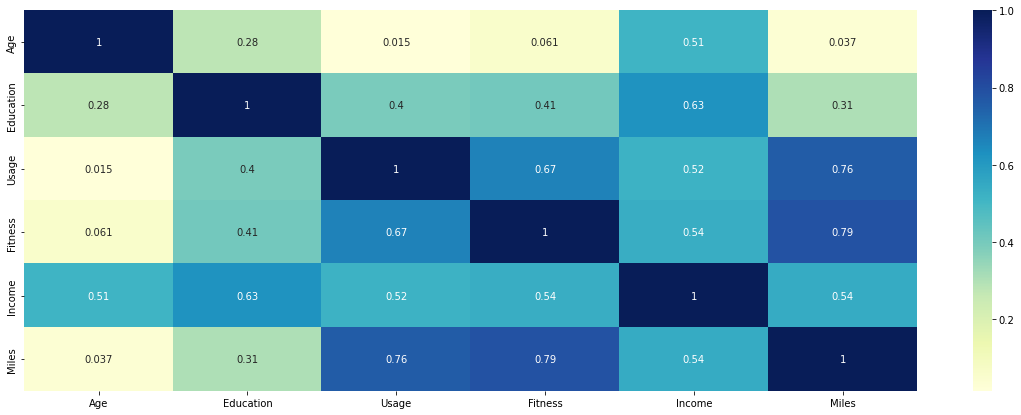

In [ ]:
# heatmap
sns.heatmap(aerofit.corr(), annot=True, cmap='YlGnBu')
plt.show()

####<font color="cyan" style="sans-serif">Few Observations </font>

Here Pearson co-efficient is used to evalute the correlation between numerical data points. Pearson evalutes the linear relationship between data points.


Noting down the observations which are higher than 0.5.

1. Correlation between Age & Income is 0.51 
2. Correlation between Education & Income is 0.63.
3. Correlation between Usage & Fitness is 0.67.
4. Correlation between Usage & Income is 0.52.
5. Correlation between Usage & Miles is 0.76. 
6. Correlation between Fitness & Income is 0.54.
7. Correlation between Fitness & Miles is 0.79.
8. Correlation between Income & Miles is 0.54.

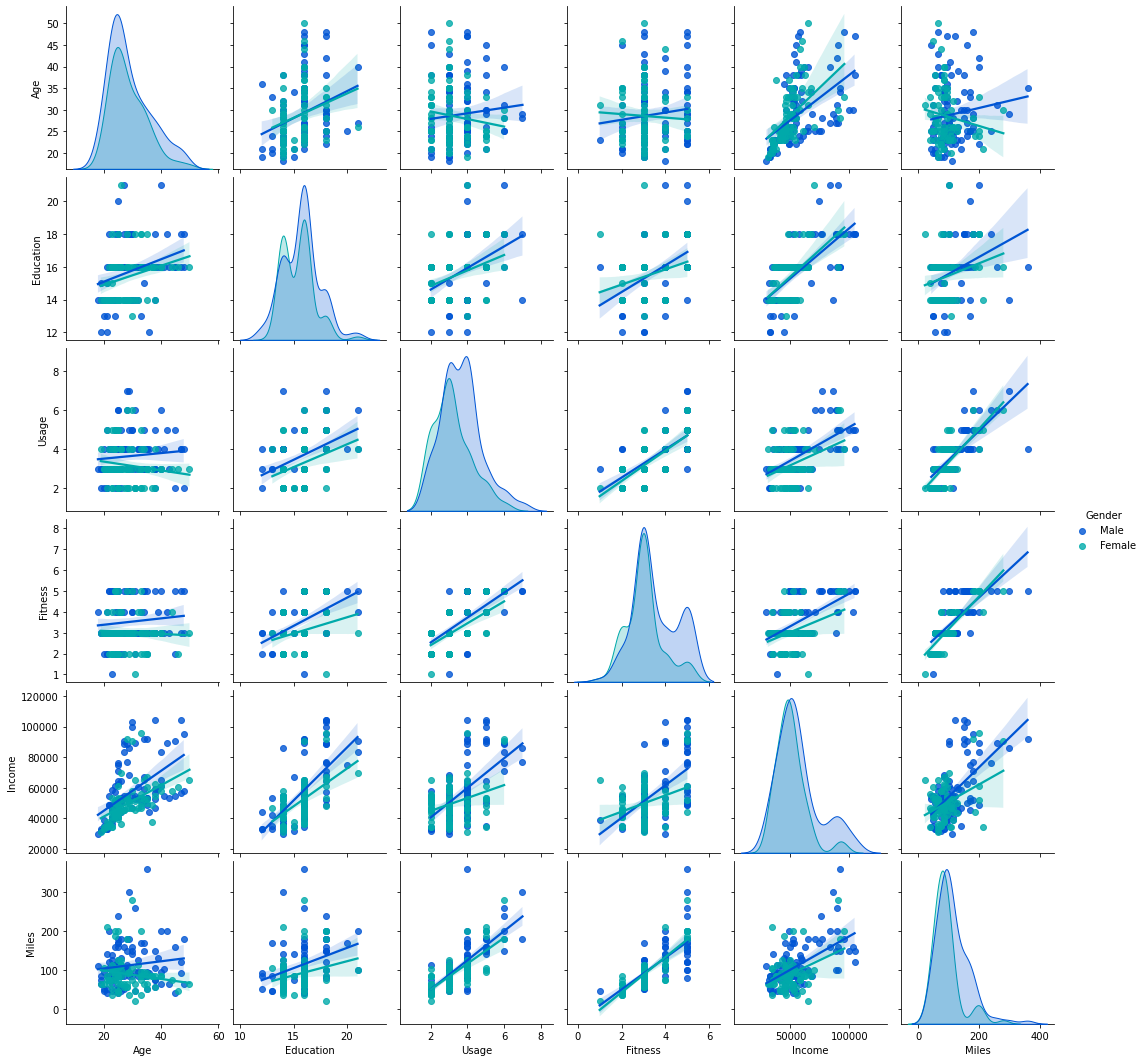

In [ ]:
# pairplot
rcParams['figure.figsize'] = 20, 7
sns.pairplot(aerofit, palette='winter', hue='Gender', kind='reg')
plt.show()

Same conclusion as heatmap (correlation).

###<font color="red" style="sans-serif">Univariate Analysis</font>


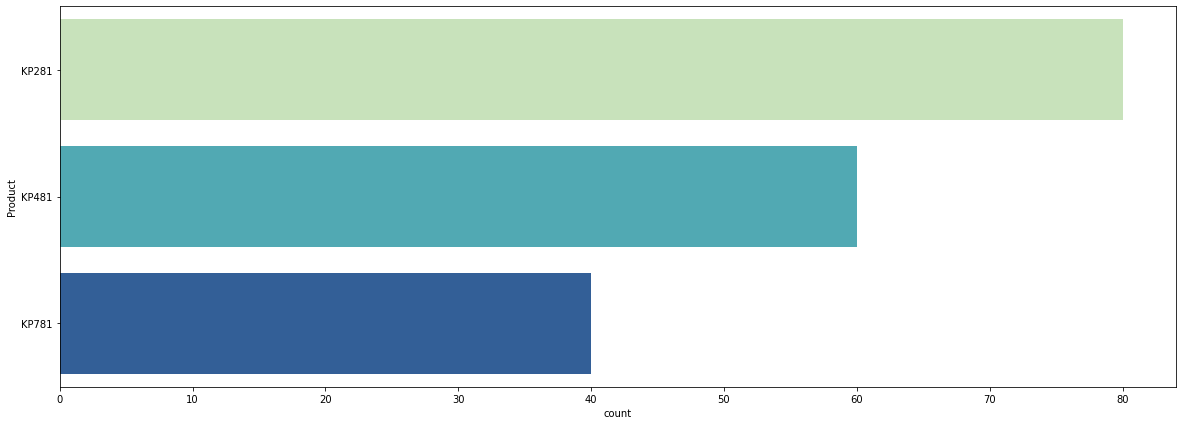

In [ ]:
# Product
sns.countplot(data=aerofit, y='Product', palette='YlGnBu')
plt.show()

###<font color="cyan" style="sans-serif">Observations</font>

1. KP281 is the most purchased product having the count of 80.
2. KP481 is the second most purchased product having the count of 60.
3. Lastly KP781 is the purchased product having the count of 40.


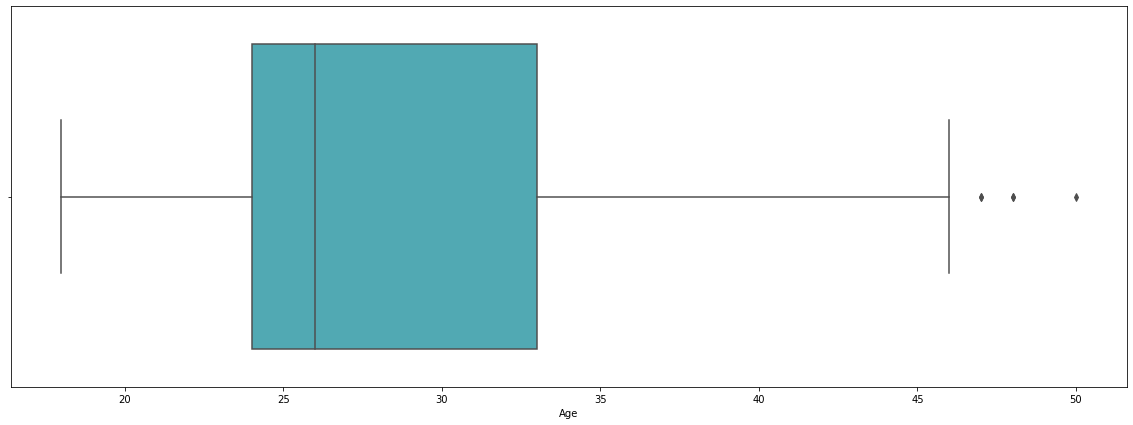

In [ ]:
# Product
sns.boxplot(data=aerofit, x='Age', palette='YlGnBu')
plt.show()

In [ ]:
q75, q25 = np.percentile(aerofit['Age'], [75 ,25])
age_iqr = q75 - q25
print("Inter Quartile Range (IQR) of Age is", age_iqr)

Inter Quartile Range (IQR) of Age is 9.0


###<font color="cyan" style="sans-serif">Observations</font>

1. Most common age range is roughly between 22 - 32.
2. There are few data points whose age is more than 46 years (Outlier).
3. Difference between 25th and 75th percentile is 9 years.

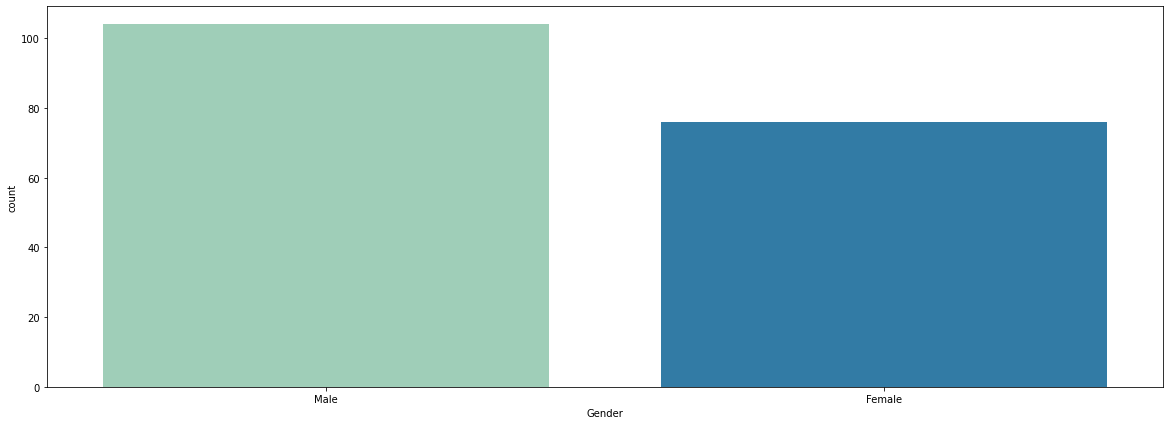

In [ ]:
#Gender
sns.countplot(data=aerofit, x="Gender", palette='YlGnBu')
plt.show()

###<font color="cyan" style="sans-serif">Observations</font>

1. Male is the most frequent buyer of the treadmills with count more than 100.
2. Female is the second most frequent buyer with count of roughly 75.

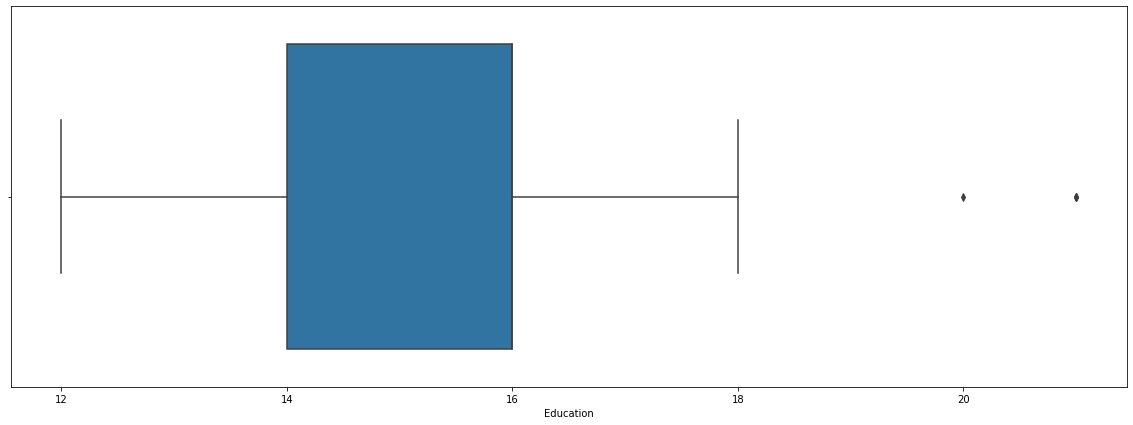

In [ ]:
#Education
sns.boxplot(data=aerofit, x="Education")
plt.show()

In [ ]:
q75, q25 = np.percentile(aerofit['Education'], [75 ,25])
education_iqr = q75 - q25
print("Inter Quartile Range (IQR) of Education is", education_iqr)

Inter Quartile Range (IQR) of Education is 2.0


###<font color="cyan" style="sans-serif">Observations</font>

1. Majority of the people have education between 14-16 years.
2. There are only two people who have education more than 20 years (Outlier).
3. Difference between 25th and 75th percentile is 2 years.

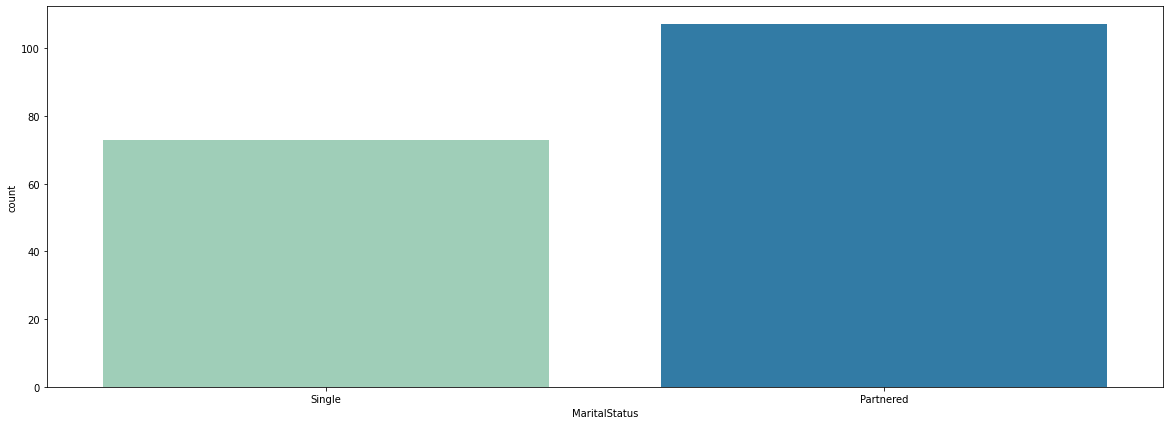

In [ ]:
#Martial Status
sns.countplot(data=aerofit, x='MaritalStatus', palette='YlGnBu')
plt.show()

###<font color="cyan" style="sans-serif">Observations</font>

1. Couples are the most frequent buyers of the treadmill with count of more than 100.
2. Singles are the 2nd most frequent buyers of the treadmill with count of roughly 75.

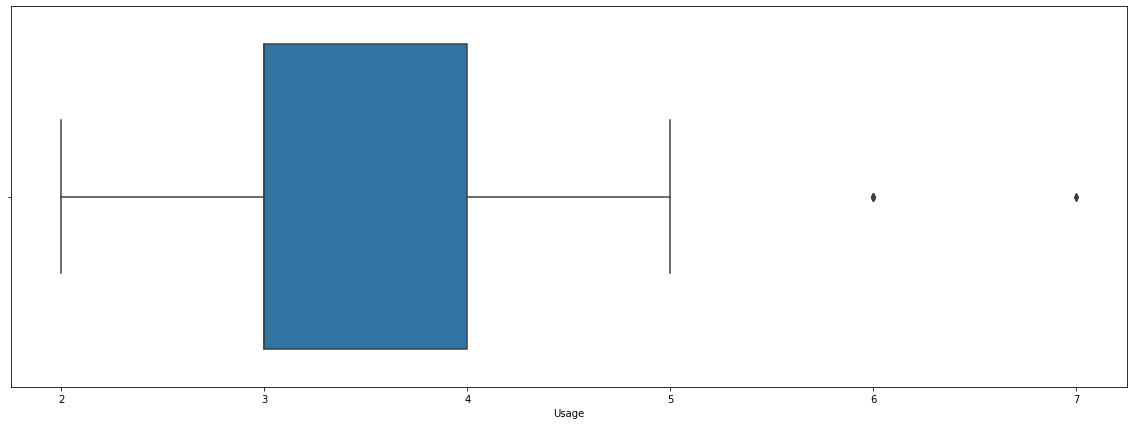

In [ ]:
sns.boxplot(data=aerofit, x='Usage')
plt.show()

In [ ]:
q75, q25 = np.percentile(aerofit['Usage'], [75 ,25])
usage_iqr = q75 - q25
print("Inter Quartile Range (IQR) of Usage is", usage_iqr)

Inter Quartile Range (IQR) of Usage is 1.0


###<font color="cyan" style="sans-serif">Observations</font>

1. Most of the customers use treadmill 3 - 4 times per week.
2. Very few people walk/run on treadmill 6 - 7 times per week (Outlier).
3. Difference between 25th and 75th percentile is 1.0.

Overall, it looks like very few people are regular in their workouts, while others are working-out casually.

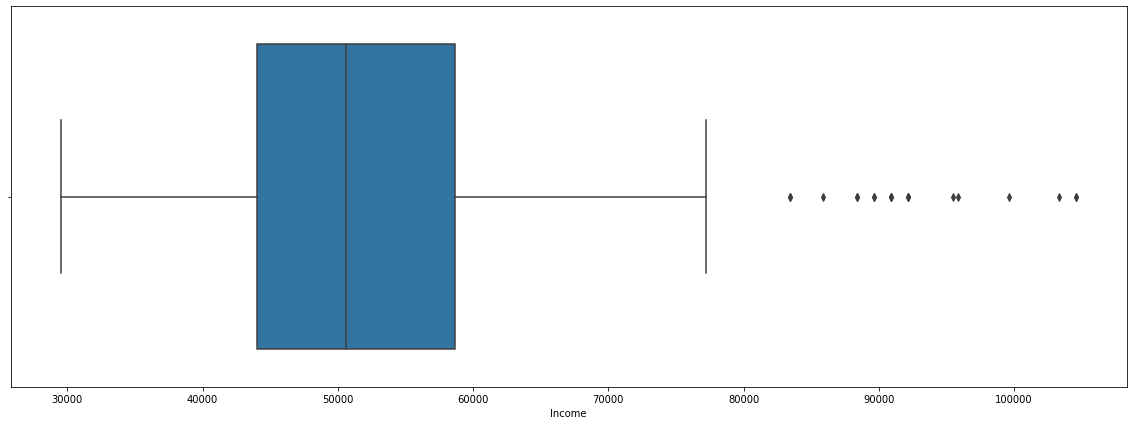

In [ ]:
sns.boxplot(data=aerofit, x='Income')
plt.show()

In [ ]:
q75, q25 = np.percentile(aerofit['Income'], [75 ,25])
income_iqr = q75 - q25
print("Inter Quartile Range (IQR) of Usage is", income_iqr)

Inter Quartile Range (IQR) of Usage is 14609.25


###<font color="cyan" style="sans-serif">Observations</font>

1. Most of the customers have income between 45K$ - 60K$
2. Very few people have income more than roughly 85K$ - 100K$.
3. Difference between 25th and 75th percentile is 14609$.

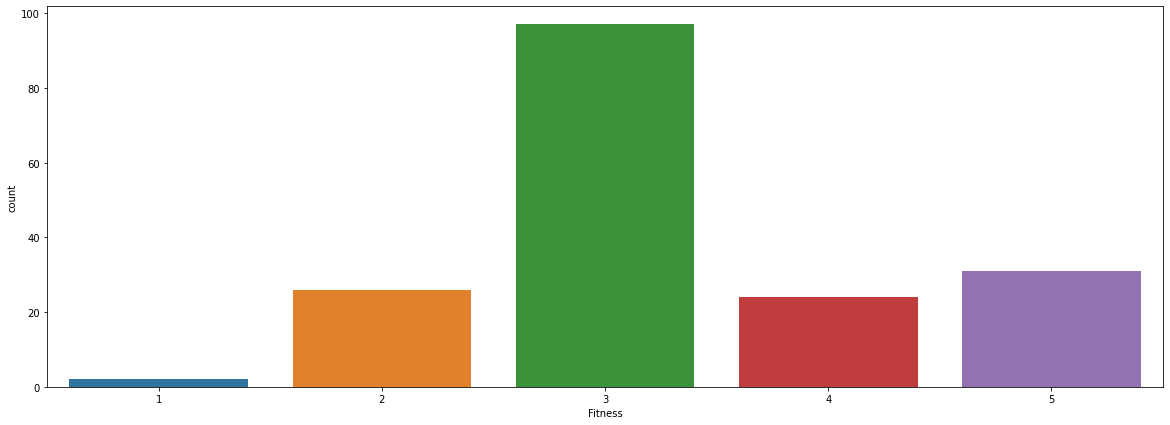

In [ ]:
#fitness
sns.countplot(data=aerofit, x="Fitness")
plt.show()

###<font color="cyan" style="sans-serif">Observations</font>

1. Customers who purchased treadmills are moderately fit (Rating - 3). 
2. Distribution of customers rating of 2 & 4 are roughly same.
3. Value count of customers of fitness rating 5 is slightly more than 2 and 4.

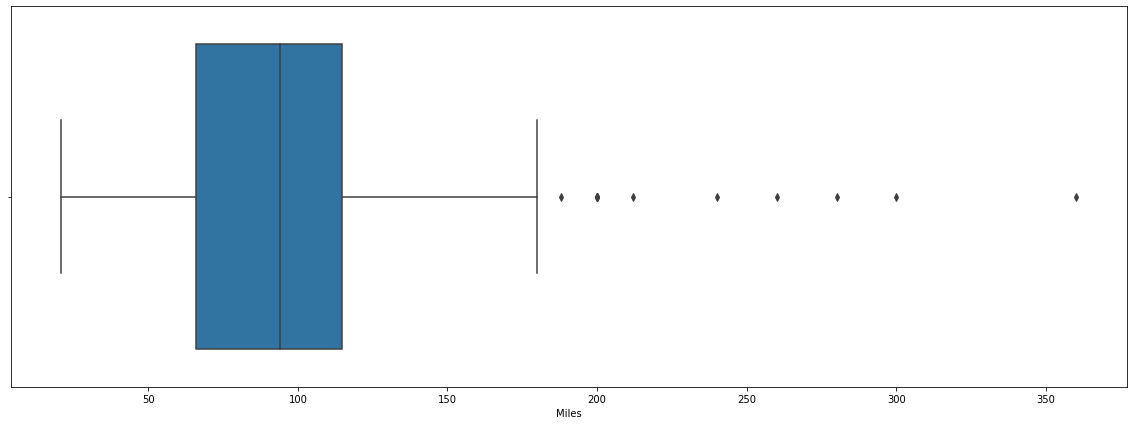

In [ ]:
#miles
sns.boxplot(data=aerofit, x='Miles')
plt.show()

In [ ]:
q75, q25 = np.percentile(aerofit['Miles'], [75 ,25])
miles_iqr = q75 - q25
print("Inter Quartile Range (IQR) of Miles is", miles_iqr)

Inter Quartile Range (IQR) of Miles is 48.75


###<font color="cyan" style="sans-serif">Observations</font>

1. Most of the distance travelled by the customer on the treadmill is roughly between 75-120 Miles.
2. Very few people have the travelled more than roughly 200 Miles (Outliers).
3. Difference between 25th and 75th percentile is 48.75 miles (running/walking).

P.S: Correlation between Miles & Fitness is fairly high (0.79).

##<font color="red" style="sans-serif">Bivariate Analysis</font>

In [ ]:
#Average Income of customer buying each model
aerofit.groupby('Product')['Income'].mean()

Product
KP281    46418.025
KP481    48973.650
KP781    75441.575
Name: Income, dtype: float64

In [ ]:
#Average Usage of customer buying each model
aerofit.groupby('Product')['Usage'].mean()

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

In [ ]:
#Average Fitness of customer buying each model
aerofit.groupby('Product')['Fitness'].mean()

Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64

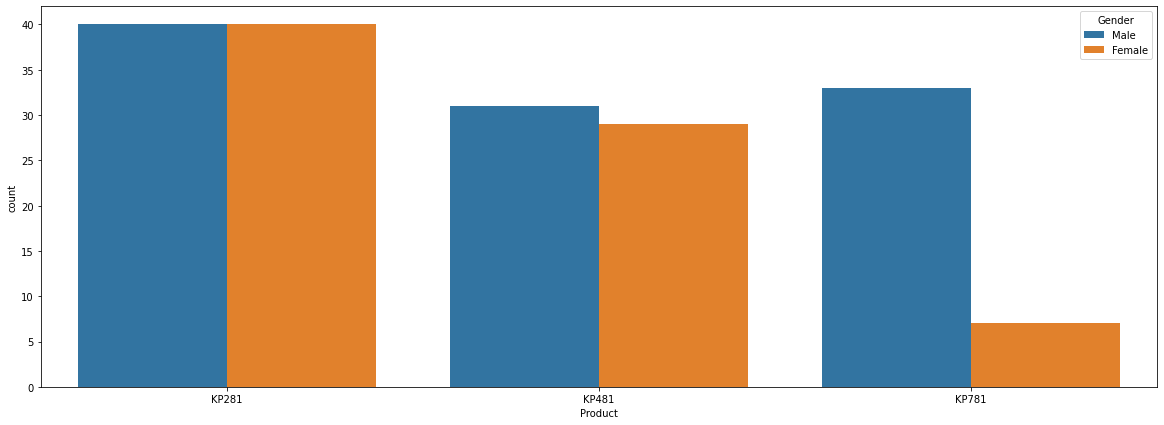

In [ ]:
# Gender & Product
sns.countplot(data=aerofit, x='Product', hue='Gender')
plt.show()

###<font color="cyan" style="sans-serif">Observations</font>

1. Most common preference for both gender is KP281. 
2. Ratio of Male/Female customers is huge in KP781.
3. Distribution of Male & Female is roughly same for KP481.
4. Males have bought more KP781 compare to KP481.

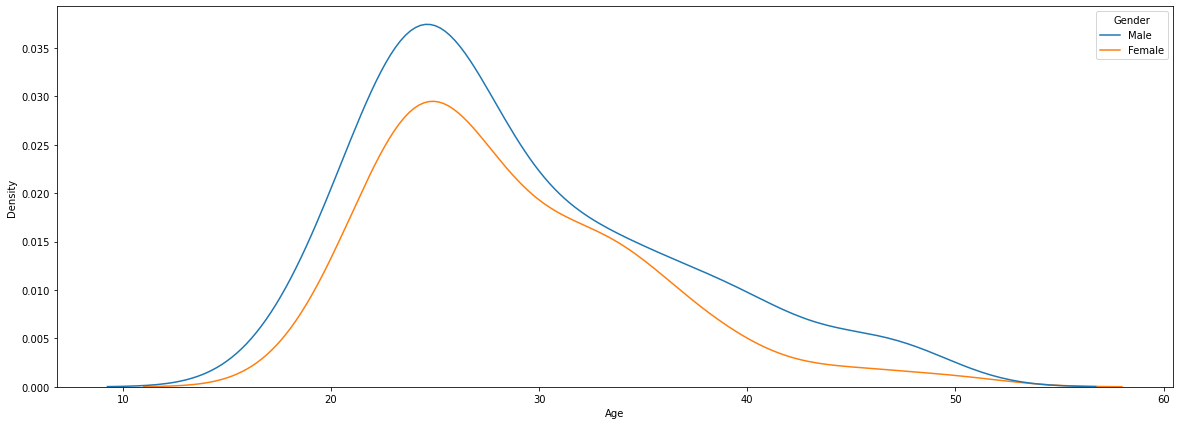

In [ ]:
# Gender & Product
sns.kdeplot(data=aerofit, x='Age', hue='Gender')
plt.show()

###<font color="cyan" style="sans-serif">Observations</font>

1. Most of the customers are in the age range of 20-40.
2. Most of the Men are treadmill buyers.

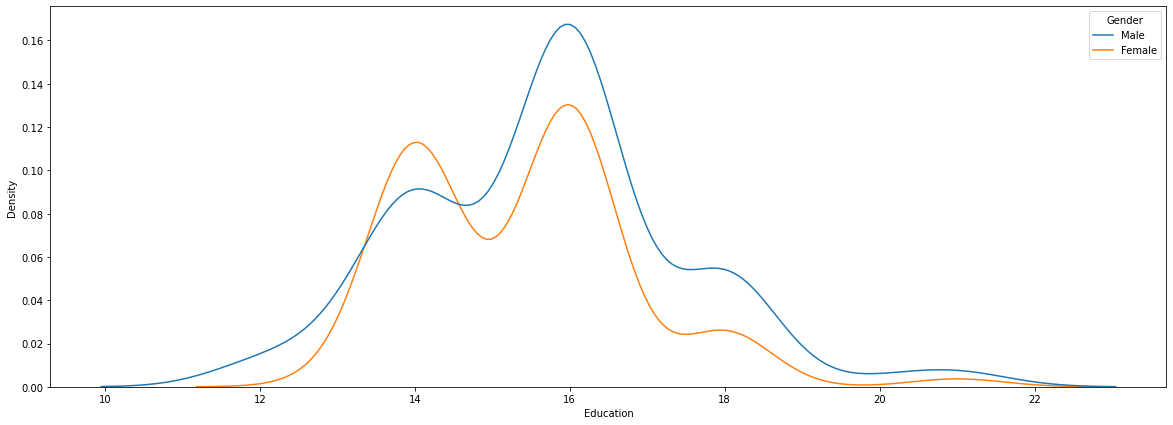

In [ ]:
sns.kdeplot(data=aerofit, x='Education', hue='Gender')
plt.show()

###<font color="cyan" style="sans-serif">Observations</font>

1. Both genders have roughly same education years.
2. As the dataset contains majority of Male customers, Education count of male are high.
3. There are some female who has 13-15 years of education.

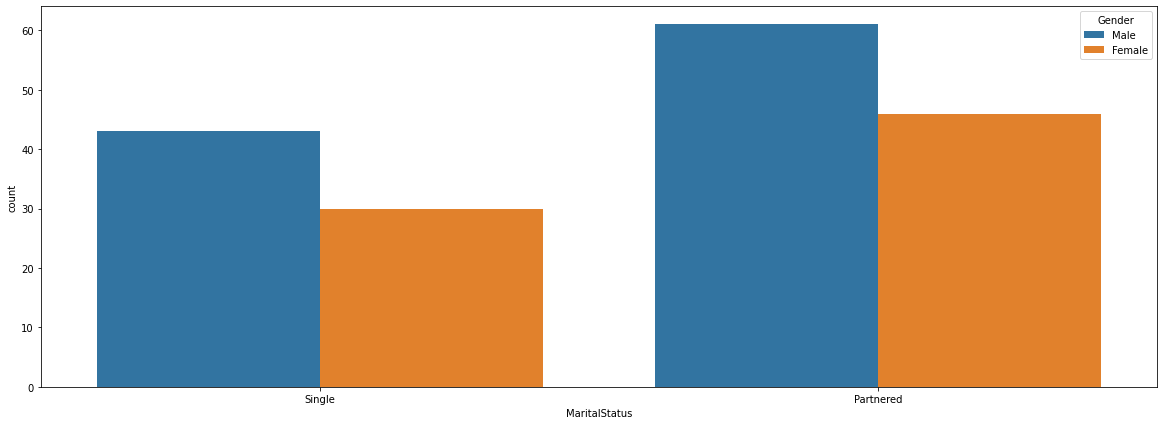

In [ ]:
sns.countplot(data=aerofit, x='MaritalStatus', hue='Gender')
plt.show()

###<font color="cyan" style="sans-serif">Observations</font>

1. Irrespective of Martial Status, Men are the most frequent buyer of the treadmill.
2. Partnered female are more frequent buyers compare to Single females.

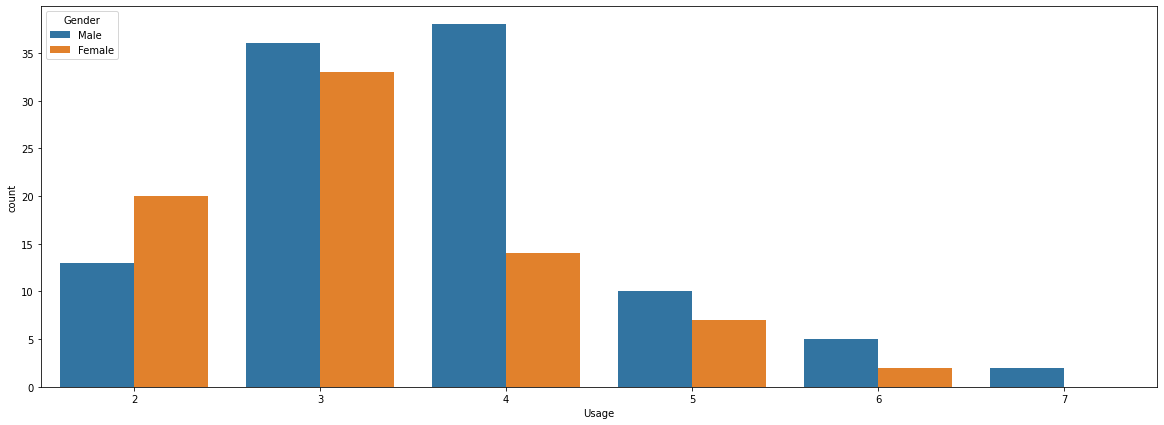

In [ ]:
sns.countplot(data=aerofit, x='Usage', hue='Gender')
plt.show()

###<font color="cyan" style="sans-serif">Observations</font>

1. Majority of males seems to use treadmill 4 times per week.
2. Followed by males using 3 times per week. Most of the women seems to use treadmills 3 times per week.
3. Very few males use treadmills 7 times per week, while no female seems to using 7 times per week.


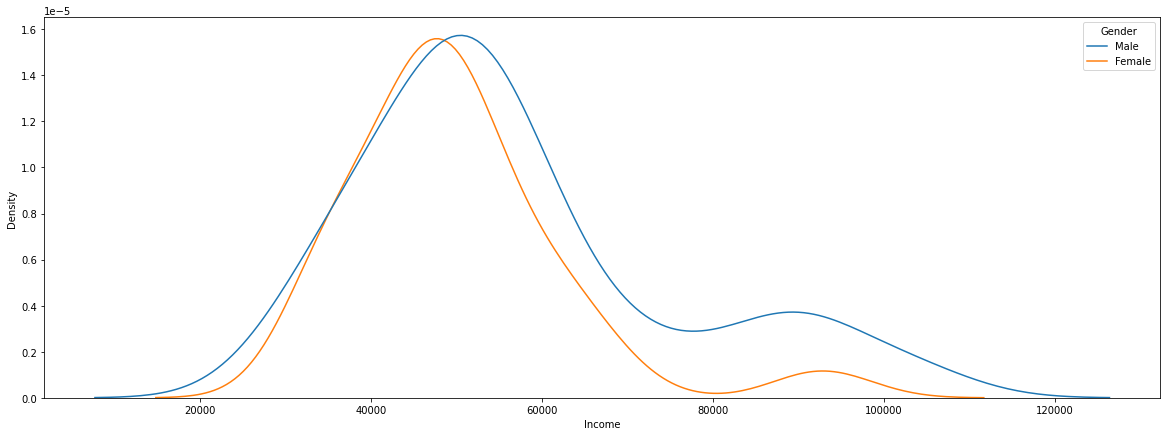

In [ ]:
sns.kdeplot(data=aerofit, x='Income', hue='Gender')
plt.show()

###<font color="cyan" style="sans-serif">Observations</font>

1. Peek Income of both genders are roughly same i.e., between 40K - 70K.
2. Majority of the males have annual salary more than 75K, while few female have the same.
3. Distribution of salary less 30K is same in both genders.


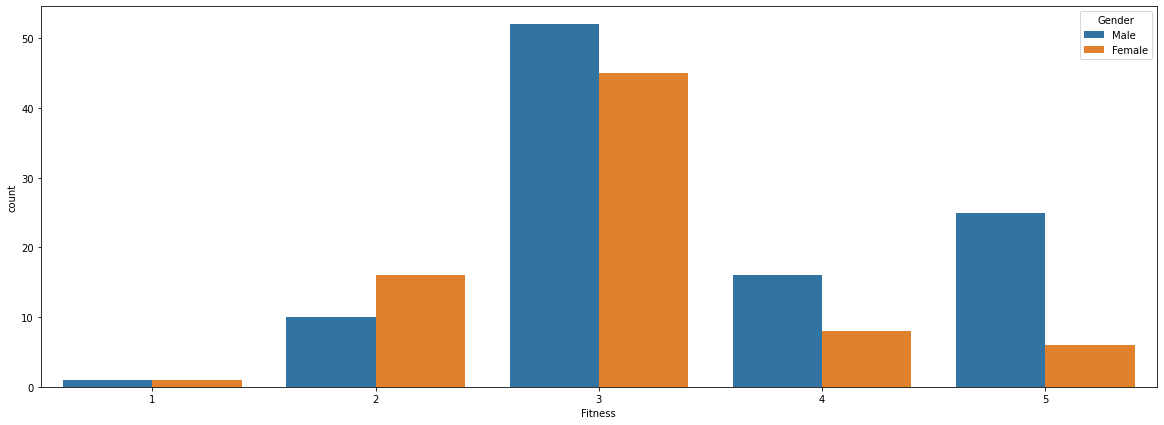

In [ ]:
sns.countplot(data=aerofit, x='Fitness', hue='Gender')
plt.show()

###<font color="cyan" style="sans-serif">Observations</font>

1. Both genders are moderately fit (Fitness scale 3).
2. There are more men who have self-rating of 5 compare to women.
3. Distribution of self-rating 1 for both genders is roughly same.
4. There are more women who have self-rating of 2 compare to men.


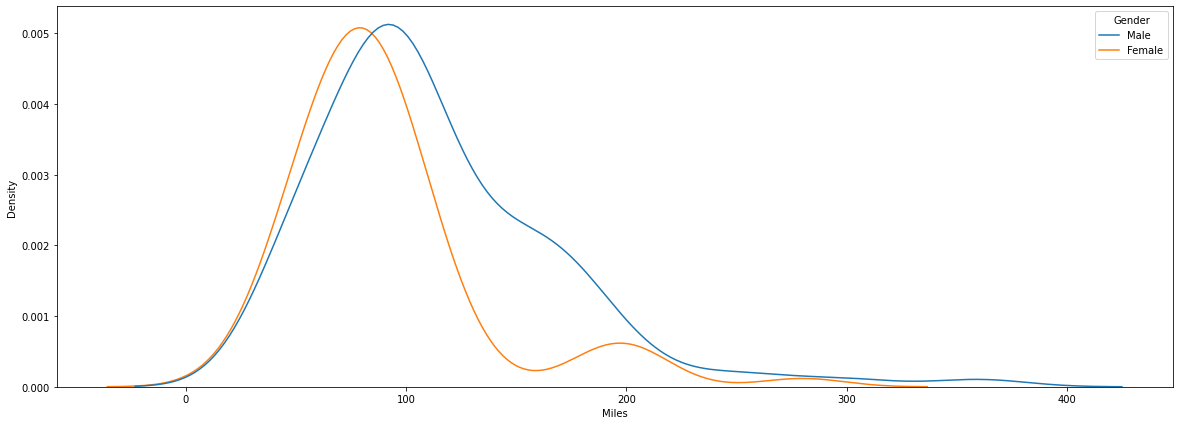

In [ ]:
sns.kdeplot(data=aerofit, x='Miles', hue='Gender')
plt.show()

###<font color="cyan" style="sans-serif">Observations</font>

1. Both gender have peak miles **roughly** between 80-100 miles.
2. Very few males walk/run on treadmill for more than **roughly** 320 miles, while few females walk/run for 320 miles.
3. Distribution starts to deviate onwards 150 miles as the gap starts to increase and the gap stops at 200 miles.


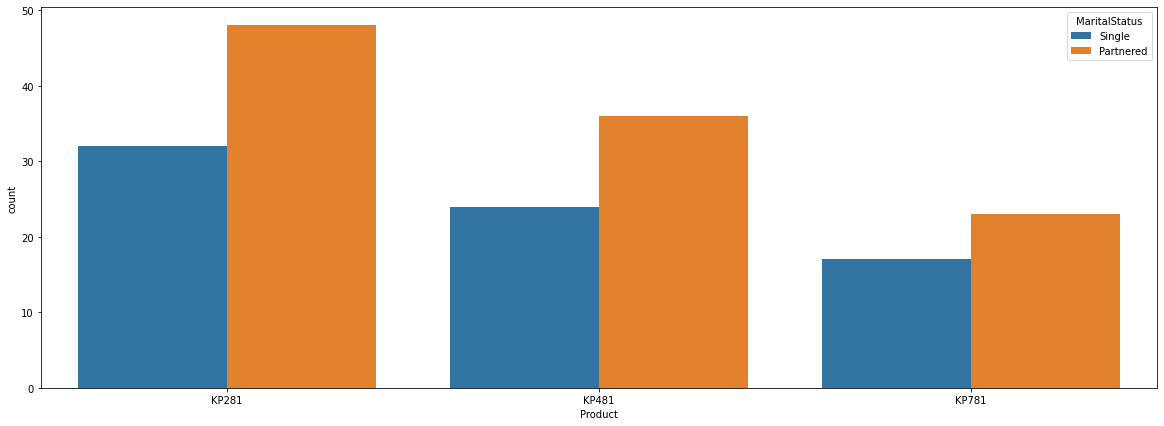

In [ ]:
# Preferred product of Couples and Singles
sns.countplot(data=aerofit, x="Product", hue='MaritalStatus')
plt.show()

###<font color="cyan" style="sans-serif">Observations</font>

1. Most preferred product for married couples is KP281. It is also the preferred prdouct of Singles as well.
2. Followed by KP481 & KP781 respectively.
3. Maybe it's because KP281 is cheaper than KP481 and KP781.


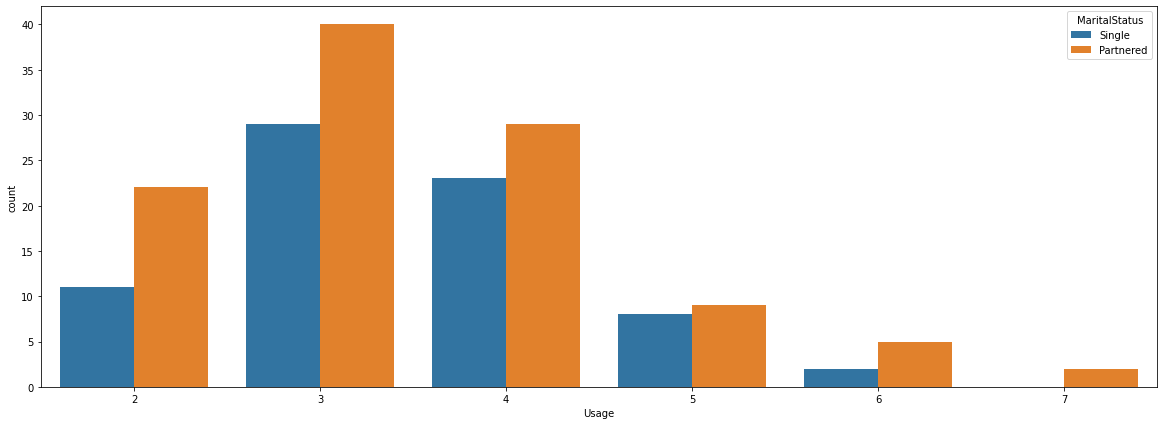

In [ ]:
# Usage of Couples and Singles
sns.countplot(data=aerofit, x="Usage", hue='MaritalStatus')
plt.show()

###<font color="cyan" style="sans-serif">Observations</font>

1. Overall usage of married couples is more compare to Singles.
2. Irrespective of Martial Status, usage is 3 times per week. Followedby 4 times per week.
3. Partnered status have small sample of doing workout 7 times per week, while no single people have more than 6 times per week.



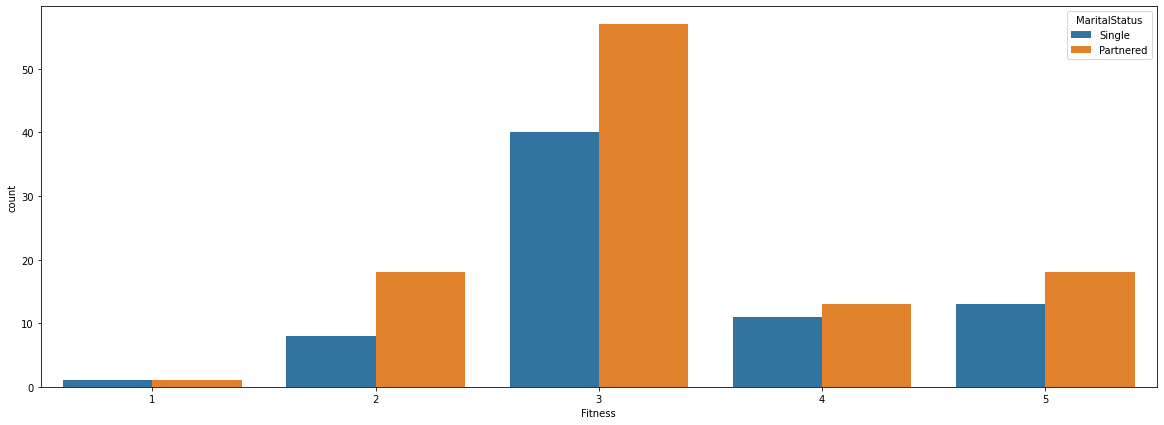

In [ ]:
# Fitness of Couples and Singles
sns.countplot(data=aerofit, x="Fitness", hue='MaritalStatus')
plt.show()

###<font color="cyan" style="sans-serif">Observations</font>

1. Most of the customers are moderately fit irrespective of their Martial Status.
2. Followed by Fitness rating of 5 where majority of customers are married.
3. Fitness rating of 1 is same for Single and Married people. Same thing can be seen in fitness vs gender graph.



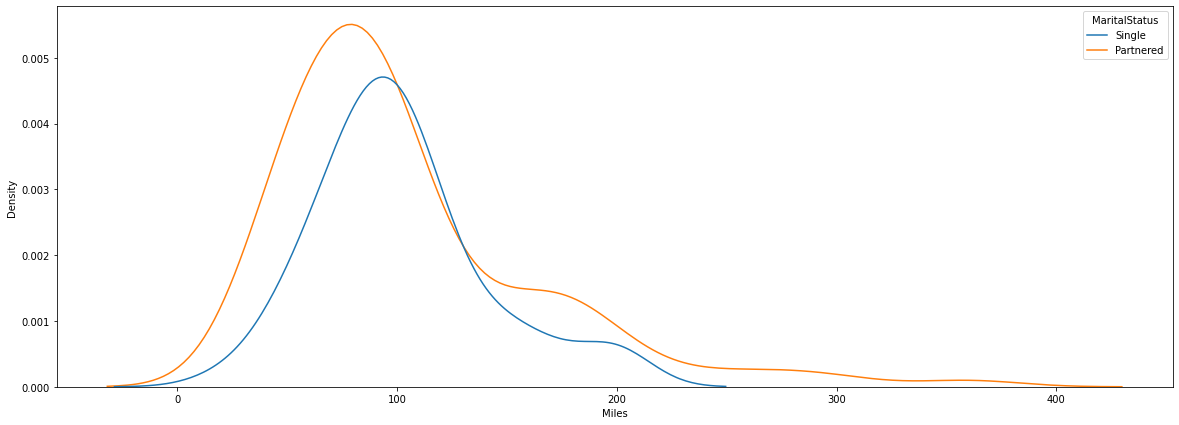

In [ ]:
# Miles (walk/run) of Couples and Singles
sns.kdeplot(data=aerofit, x="Miles", hue='MaritalStatus')
plt.show()

###<font color="cyan" style="sans-serif">Observations</font>


1.   Partnered status prefers to workout more on treadmills.
2.   Distribution of Single & Partnered tends overlap at 100-150 miles.
3.   Parterned tends to workout even after 200 miles, where 200 is the upper limit of singles.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


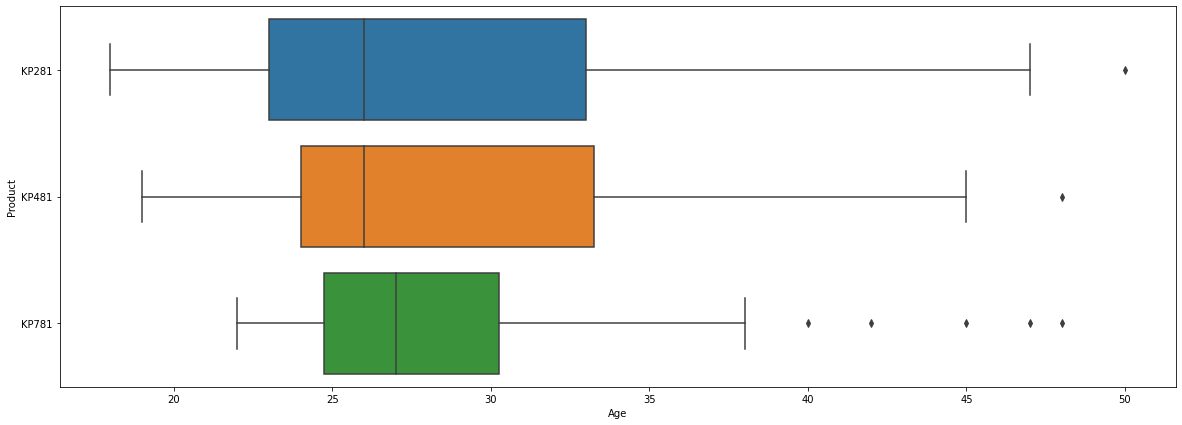

In [ ]:
 sns.boxplot(aerofit['Age'],aerofit['Product'])
 plt.show()

<font color="cyan">Observations</font>
1. Age distribution in KP281 is maximum, followed by KP481, and KP781 respectively.
2. There is only one outlier in KP281, followed by one and five outliers in KP481 and KP781 respectively.
3. Buyer of KP281 is in the range of roughly 22 - 33 years.
4. Buyer of KP481 is in the range of roughly 24 - 34 years. 
5. Buyer of KP781 is in the range of roughly 25 - 30 years.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


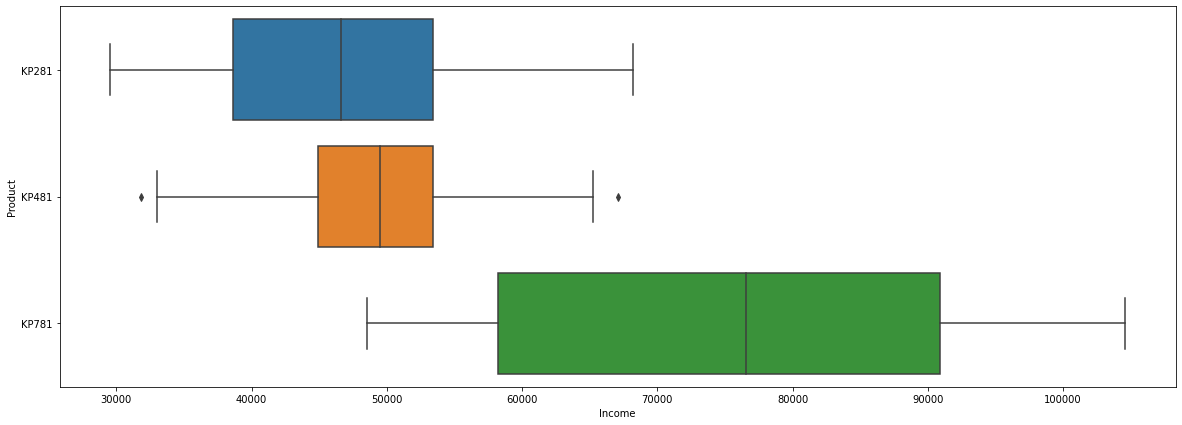

In [ ]:
 sns.boxplot(aerofit['Income'],aerofit['Product'])
 plt.show()

<font color="cyan">Observations</font>
1. Income distribution in KP781 is maximum, followed by KP281, and KP481 respectively.
2. There is no outlier in KP781 and KP281, while KP481 has two outliers at extreme ends i.e., Lower IQR and Upper IQR.
3. Income distribution of KP281 buyer is roughly between 39K - 53K dollars.
4. Income distribution of KP481 buyer is roughly between 45K - 53K dollars.
5. Income distribution of KP781 buyer is roughly between 59K - 92K dollars.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


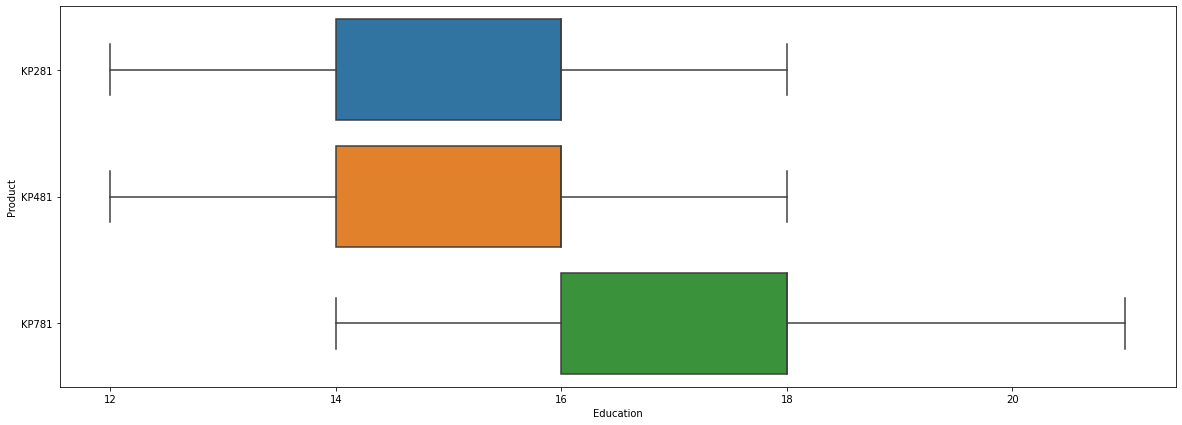

In [ ]:
 sns.boxplot(aerofit['Education'],aerofit['Product'])
 plt.show()

<font color="cyan">Observations</font>
1. Distributions of Education for all three models is same.
2. Range of distribution for KP281 and KP481 is exactly same i.e., 14 - 16 years.
3. Range of distribution for KP781 is between 16 - 18 years of education.
4. There is no outlier for all three models w.r.t Education.
5. People with more education years tend to buy KP781 as correlation between Education & Income is high (0.63).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


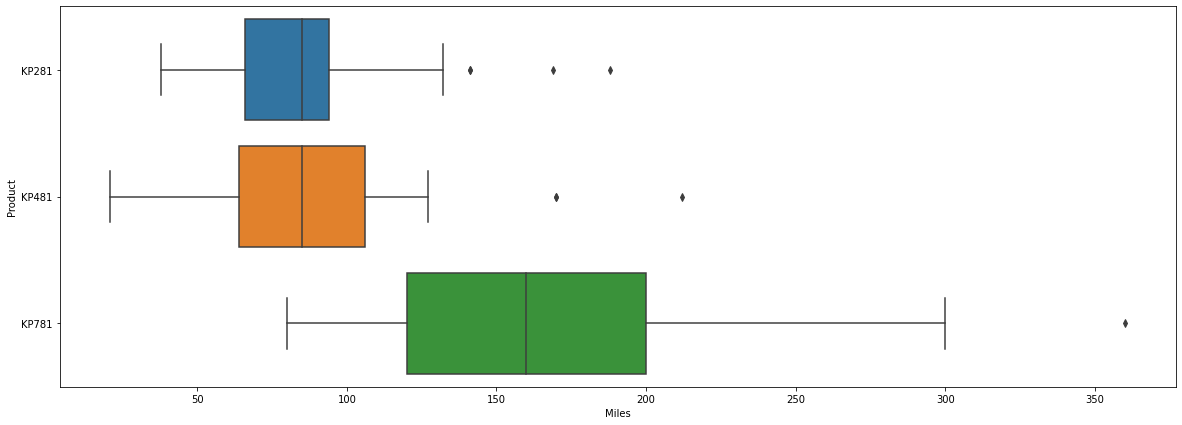

In [ ]:
 sns.boxplot(aerofit['Miles'],aerofit['Product'])
 plt.show()

<font color="cyan">Observations</font>

1. Distribution of Miles is maximum in KP781, followed by KP481 and KP281, respectively.
2. People tend to workout more on KP781, range is roughly between 125 Miles - 200 Miles.
3. Range of Miles on KP481 is roughly between 75 - 100 Miles.
4. Range of Miles on KP281 is roughly between 75 - 80 Miles.
5. There is only one outlier in KP781 w.r.t Miles, followed by two and three in KP481 and KP281 respectively.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


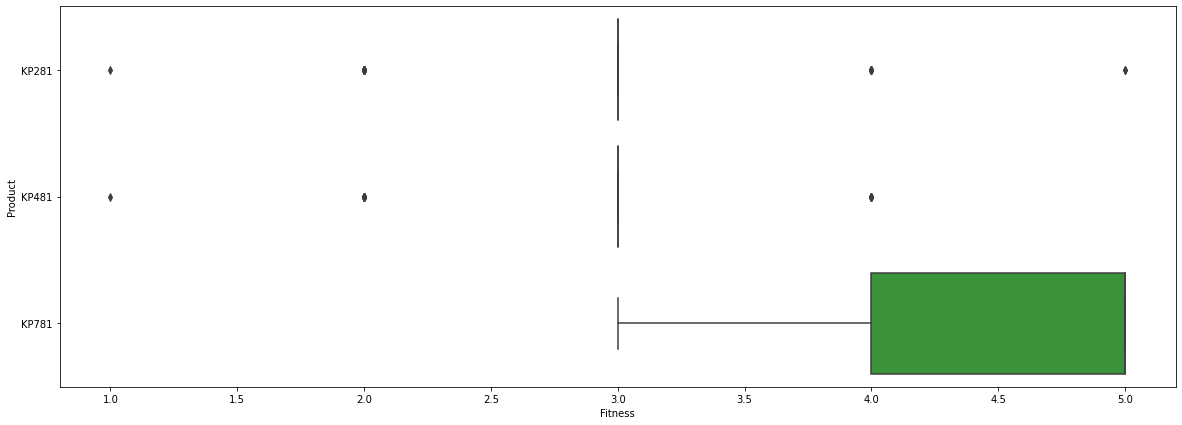

In [ ]:
 sns.boxplot(aerofit['Fitness'],aerofit['Product'])
 plt.show()

<font color="cyan">Observations</font>

1. Fitness Distribution of KP781 is maximum, while for KP281 and KP481 distribution is same.
2. There's no outlier in fitness rating w.r.t to KP781, while there's three and four outliers in KP481 and KP281, respectively.
3. Fitness Median of KP281 and KP481 is same.

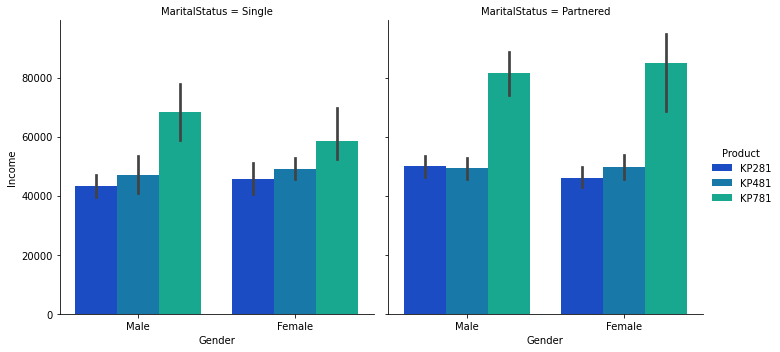

In [ ]:
# Income by gender by product and by marital status
sns.catplot(x='Gender',y='Income', hue='Product', col='MaritalStatus', data=aerofit, kind='bar', palette='winter')
plt.show()

###<font color="cyan" style="sans-serif">Observations</font>

1. Partnered Female bought KP781 treadmill compared to Partnered Male.
2. Single Female customers bought KP281 treadmill slightly more compared to Single Male customers.
3. Partnered Male customers bought KP281 treadmill slightly more than Single Male customers.
4. There are more single Males buying treadmill than single Females.
5. Single Male customers bought KP781 treadmill compared to single Female.
6. Distribution of KP481 in Single & Parterned, Male & Female is same.
7. Partnered customers are more than Single customers.

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,5

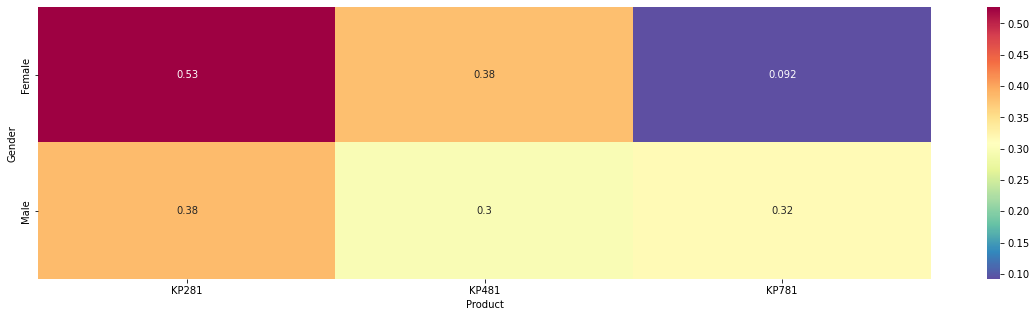

In [ ]:
sns.heatmap(pd.crosstab(aerofit['Gender'], aerofit['Product'], normalize='index'), annot=True, cmap='Spectral_r')
plt.show()

###<font color="cyan" style="sans-serif">Conditional Probability, P(Product | Gender)</font>


1.   Probability of buying KP281 given that the customer is male, P(Product=KP281 | Customer=Male) = 0.38.
2.   Probability of buying KP481 given that the customer is male, P(Product=KP481 | Customer=Male) = 0.3.
3.   Probability of buying KP781 given that the customer is male, P(Product=KP781 | Customer=Male) = 0.32.

1.   Probability of buying KP281 given that the customer is female, P(Product=KP281 | Customer=Female) = 0.53.
2.   Probability of buying KP481 given that the customer is female, P(Product=KP481 | Customer=Female) = 0.38.
3.   Probability of buying KP781 given that the customer is female, P(Product=KP781 | Customer=Female) = 0.092.



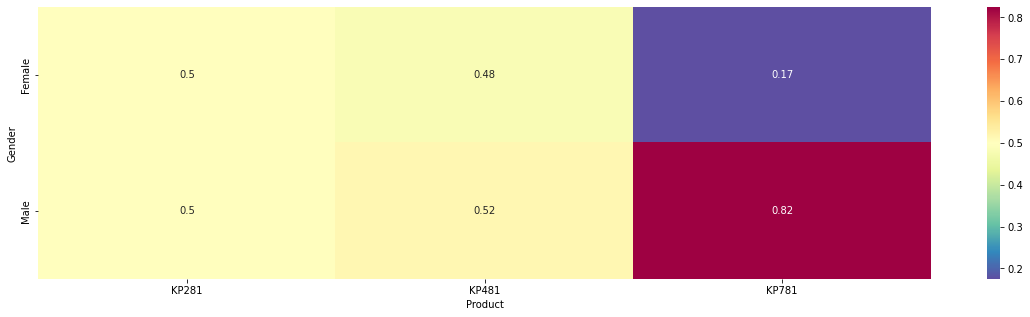

In [ ]:
sns.heatmap(pd.crosstab(aerofit['Gender'], aerofit['Product'], normalize='columns'), annot=True, cmap='Spectral_r')
plt.show()

###<font color="cyan" style="sans-serif">Conditional Probability, P(Gender | Product)</font>


1.   Probability that customer is Male given that he bought KP281, P(Customer=Male | Producty=KP281) = 0.50.

2.   Probability that customer is Female given that she bought KP281, P(Customer=Female | Product=KP281) = 0.50.

3.   Probability that customer is Male given that he bought KP481, P(Customer=Male | Product=KP481) = 0.52.

4.   Probability that customer is Female given that she bought KP481, P(Customer=Female | Product=KP481) = 0.48.

5.   Probability that customer is Male given that he bought KP781, P(Customer=Male | Product=781) = 0.82.

6.   Probability that customer is Female given that he bought KP781, P(Customer=Female | Product=KP781) = 0.17.



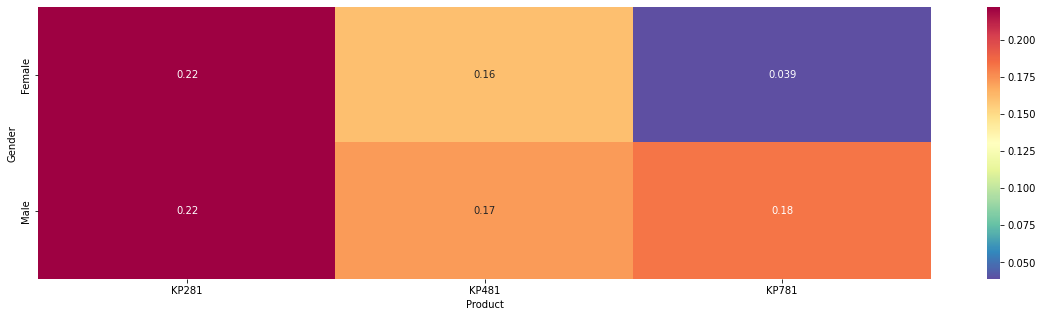

In [ ]:
sns.heatmap(pd.crosstab(aerofit['Gender'], aerofit['Product'], normalize=True), annot=True, cmap='Spectral_r')
plt.show()

###<font color="cyan" style="sans-serif">Joint Probability, P(Product Intersection Gender)</font>

1. Probability that customer buys KP281 and gender is Male, P(KP281 Intersection Male) = 0.22.
2. Probability that customer buys KP481 and gender is Male, P(KP481 Intersection Male) = 0.17.
3. Probability that customer buys KP781 and gender is Male, P(KP781 Intersection Male) = 0.18.
4. Probability that customer buys KP281 and gender is Female, P(KP281 Intersection Female) = 0.22.
5. Probability that customer buys KP481 and gender is Female, P(KP481 Intersection Female) = 0.16.
6. Probability that customer buys KP781 and gender is Female, P(KP781 Intersection Female) = 0.039.

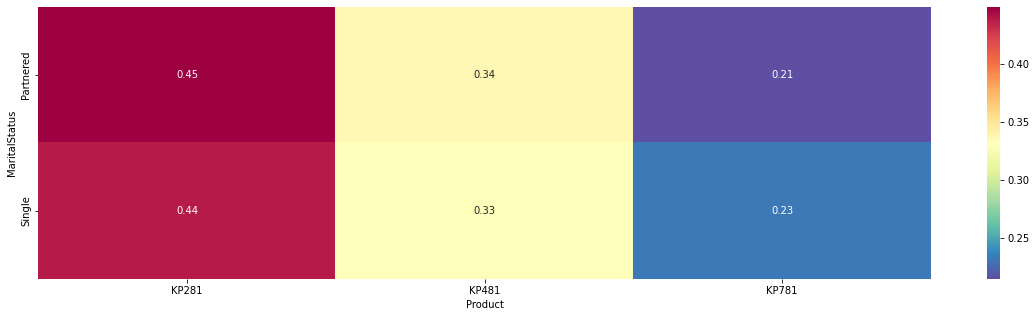

In [ ]:
sns.heatmap(pd.crosstab(aerofit['MaritalStatus'], aerofit['Product'], normalize='index'), annot=True, cmap='Spectral_r')
plt.show()

###<font color="cyan" style="sans-serif">Conditional Probability, P(Product | MaritalStatus)</font>

1.   Probability of buying KP281 given that the marital status is single, P(Product=KP281 | MaritalStatus=Single) = 0.44.
2.   Probability of buying KP481 given that the marital status is single, P(Product=KP481 | MaritalStatus=Single) = 0.33.
3.   Probability of buying KP781 given that the marital status is single, P(Product=781 | MaritalStatus=Single) = 0.23.

1.   Probability of buying KP281 given that the marital status is partnered, P(Product=KP281 | MaritalStatus=Single) = 0.45.
2.   Probability of buying KP481 given that the cmarital status is partnered, P(Product=KP481 | MaritalStatus=Single) = 0.34. 
3.   Probability of buying KP781 given that the marital status is partnered, P(Product=KP781 | MaritalStatus=Single) = 0.21.

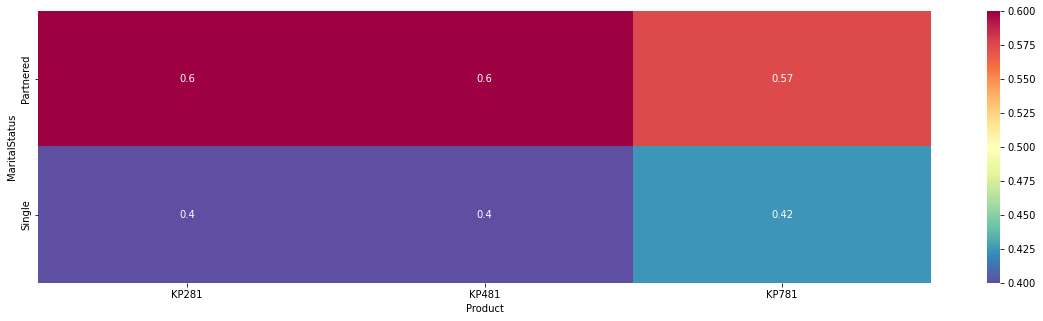

In [ ]:
sns.heatmap(pd.crosstab(aerofit['MaritalStatus'], aerofit['Product'], normalize='columns'), annot=True, cmap='Spectral_r')
plt.show()

###<font color="cyan" style="sans-serif">Conditional Probability P(MaritalStatus | Product)</font>

1.   Probability of Marital Status being Single given that KP281 is purchased, P(MaritalStatus=Single | Product=KP281) = 0.40.
2.   Probability of Marital Status being Parterned given that KP281 is purchased, P(MaritalStatus=Parterned | Product=KP281) = 0.60.
3.   Probability of Marital Status being Single given that KP481 is purchased, P(MaritalStatus=Single | Product=KP481) = 0.4.
4.   Probability of Marital Status being Partnered given that KP481 is purchased, P(MaritalStatus=Partnered | Product=KP481) = 0.6.
5.   Probability of Marital Status being Single given that KP781 is purchased, P(MaritalStatus=Single | Product=KP781 ) = 0.42.
6.   Probability of Marital Status being Partnered given that KP781 is purchased, P(MaritalStatus=Partnered | Product=KP781 ) = 0.57.

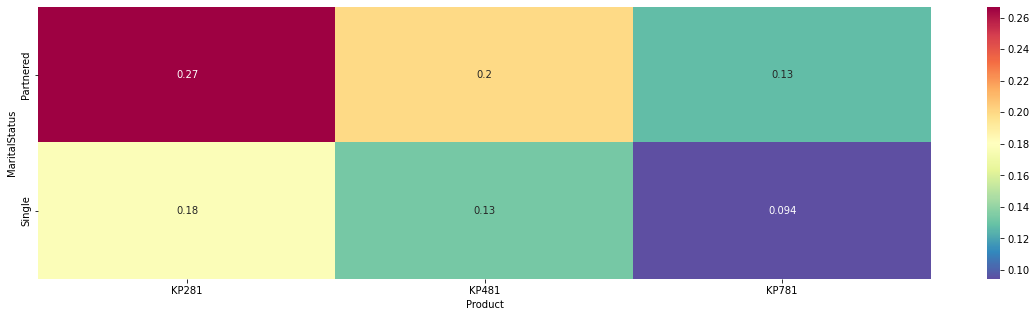

In [ ]:
sns.heatmap(pd.crosstab(aerofit['MaritalStatus'], aerofit['Product'], normalize=True), annot=True, cmap='Spectral_r')
plt.show()

##<font color="cyan">Joint Probability, P(Product Intersection MartialStatus)</font>

1. Probability of customer buying KP281 and their MartialStatus is Single, P(KP281 Intersection Single) = 0.18.
2. Probability of customer buying KP481 and their MartialStatus is Single, P(KP481 Intersection Single) = 0.13.
3. Probability of customer buying KP781 and their MartialStatus is Single, P(KP781 Intersection Single) = 0.094.
4. Probability of customer buying KP281 and their MartialStatus is Partnered, P(KP281 Intersection Partnered) = 0.27.
5. Probability of customer buying KP481 and their MartialStatus is Partnered, P(KP481 Intersection Partnered) = 0.2.
6. Probability of customer buying K7281 and their MartialStatus is Partnered, P(KP781 Intersection Partnered) = 0.13.

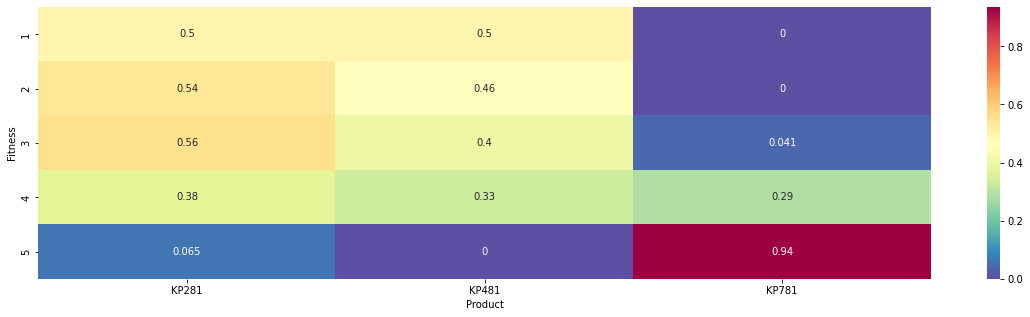

In [ ]:
sns.heatmap(pd.crosstab(aerofit['Fitness'], aerofit['Product'], normalize='index'), annot=True, cmap='Spectral_r')
plt.show()

###<font color="cyan" style="sans-serif">Conditional Probability P(Product | Fitness)</font>

1.   Probability of customer buying KP281 given fitness rating is 5, P(Product=KP281 | Fitness=5) = 0.06.
2.   Probability of customer buying KP481 given fitness rating is 5, P(Product=KP481 | Fitness=5) = 0.0 (impossible event).
3.   Probability of customer buying KP781 given fitness rating is 5, P(Product=KP781 | Fitness=5) = 0.94.
4.   Probability of customer buying KP281 given fitness rating is 4, P(Product=KP281 | Fitness=4) = 0.38.
5.   Probability of customer buying KP481 given fitness rating is 4, P(Product=KP481 | Fitness=4) = 0.33.
6.   Probability of customer buying KP781 given fitness rating is 4, P(Product=KP781 | Fitness=4) = 0.29.
7.   Probability of customer buying KP281 given fitness rating is 3, P(Product=KP281 | Fitness=3) = 0.56.
8.   Probability of customer buying KP481 given fitness rating is 3, P(Product=KP481 | Fitness=3) = 0.4.
9.   Probability of customer buying KP781 given fitness rating is 3, P(Product=KP781 | Fitness=3) = 0.04.
10.  Probability of customer buying KP281 given fitness rating is 2, P(Product=KP281 | Fitness=2) = 0.54.
11.  Probability of customer buying KP481 given fitness rating is 2, P(Product=KP481 | Fitness=2) = 0.46.
12.  Probability of customer buying KP781 given fitness rating is 2, P(Product=KP781 | Fitness=2) = 0.0 (impossible event).
13.  Probability of customer buying KP281 given fitness rating is 1, P(Product=KP281 | Fitness=1) = 0.5.
12.  Probability of customer buying KP481 given fitness rating is 1, P(Product=KP481 | Fitness=1) = 0.5.
12.  Probability of customer buying KP781 given fitness rating is 1, P(Product=KP781 | Fitness=1) = 0.0 (impossible event).

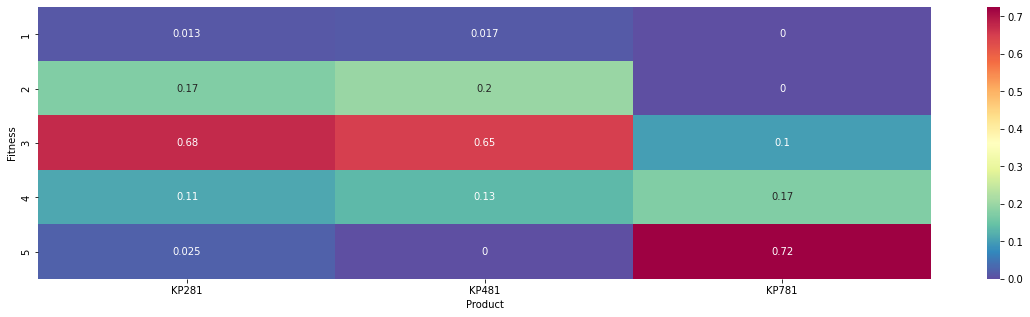

In [ ]:
sns.heatmap(pd.crosstab(aerofit['Fitness'], aerofit['Product'], normalize='columns'), annot=True, cmap='Spectral_r')
plt.show()

###<font color="cyan" style="sans-serif">Conditional Probability P(Fitness | Product)</font>

1.   Probability of customer fitness rating is 5 given that they purchased KP281, P(Fitness=5 | Product=KP281) = 0.025.
2.   Probability of customer fitness rating is 4 given that they purchased KP281, P(Fitness=4 | Product=KP281) = 0.11.
3.   Probability of customer fitness rating is 3 given that they purchased KP281, P(Fitness=3 | Product=KP281) = 0.68.
4.   Probability of customer fitness rating is 2 given that they purchased KP281, P(Fitness=2 | Product=KP281) = 0.17.
5.   Probability of customer fitness rating is 1 given that they purchased KP281, P(Fitness=1 | Product=KP281) = 0.013.
6.   Probability of customer fitness rating is 5 given that they purchased KP481, P(Fitness=5 | Product=KP481) = 0.0 (impossible event).
7.   Probability of customer fitness rating is 4 given that they purchased KP481, P(Fitness=4 | Product=KP481) = 0.13.
8.   Probability of customer fitness rating is 3 given that they purchased KP481, P(Fitness=3 | Product=KP481) = 0.65.
9.   Probability of customer fitness rating is 2 given that they purchased KP481, P(Fitness=2 | Product=KP481) = 0.2.
10.  Probability of customer fitness rating is 1 given that they purchased KP481, P(Fitness=1 | Product=KP481) = 0.017.
11.  Probability of customer fitness rating is 5 given that they purchased KP781, P(Fitness=5 | Product=KP781) = 0.72.
12.  Probability of customer fitness rating is 4 given that they purchased KP781, P(Fitness=4 | Product=KP781) = 0.17.
13.  Probability of customer fitness rating is 3 given that they purchased KP781, P(Fitness=3 | Product=KP781) = 0.1.
12.  Probability of customer fitness rating is 2 given that they purchased KP781, P(Fitness=2 | Product=KP781) = 0.0 (impossible event).
12.  Probability of customer fitness rating is 1 given that they purchased KP781, P(Fitness=1 | Product=KP781) = 0.0 (impossible event).

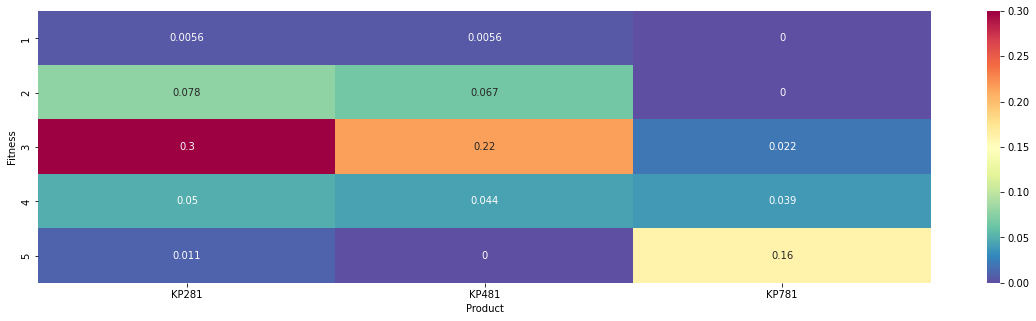

In [ ]:
sns.heatmap(pd.crosstab(aerofit['Fitness'], aerofit['Product'], normalize=True), annot=True, cmap='Spectral_r')
plt.show()

###<font color="cyan" style="sans-serif">Joint Probability P(Product Intersection Fitness)</font>

1. Probability of buying KP281 and their fitness rating is 5, P(KP281 Intersection Fitness=5) = 0.0011.
2. Probability of buying KP281 and their fitness rating is 4, P(KP281 Intersection Fitness=4) = 0.05.
3. Probability of buying KP281 and their fitness rating is 3, P(KP281 Intersection Fitness=3) = 0.3.
4. Probability of buying KP281 and their fitness rating is 2, P(KP281 Intersection Fitness=2) = 0.078.
5. Probability of buying KP281 and their fitness rating is 1, P(KP281 Intersection Fitness=1) = 0.0056.
6. Probability of buying KP481 and their fitness rating is 5, P(KP481 Intersection Fitness=5) = 0.0 (impossible event).
7. Probability of buying KP481 and their fitness rating is 4, P(KP481 Intersection Fitness=4) = 0.0044.
8. Probability of buying KP481 and their fitness rating is 3, P(KP481 Intersection Fitness=3) = 0.22.
9. Probability of buying KP481 and their fitness rating is 2, P(KP481 Intersection Fitness=2) = 0.067.
10. Probability of buying KP481 and their fitness rating is 1, P(KP481 Intersection Fitness=1) = 0.0056.
11. Probability of buying KP781 and their fitness rating is 5, P(KP781 Intersection Fitness=5) = 0.16.
12. Probability of buying KP781 and their fitness rating is 4, P(KP781 Intersection Fitness=4) = 0.039.
13. Probability of buying KP781 and their fitness rating is 3, P(KP781 Intersection Fitness=3) = 0.022.
14. Probability of buying KP781 and their fitness rating is 2, P(KP781 Intersection Fitness=2) = 0.0 (impossible event).
15. Probability of buying KP781 and their fitness rating is 1, P(KP781 Intersection Fitness=1) = 0.0 (impossible event).



In [ ]:
aerofit['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

###<font color="cyan" style="sans-serif">Marginal Probability P(Product)</font>

1. Probability of buying KP281 treadmill, P(Product=KP281) = 0.44.
1. Probability of buying KP481 treadmill, P(Product=KP481) = 0.33.
1. Probability of buying KP781 treadmill, P(Product=KP781) = 0.22.

In [ ]:
aerofit['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

###<font color="cyan" style="sans-serif">Marginal Probability P(Gender)</font>

1. Probability of customer gender is Male, P(Gender=Male) = 0.58.
2. Probability of customer gender is Female, P(Gender=Female) = 0.42.

In [ ]:
aerofit['MaritalStatus'].value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

###<font color="cyan" style="sans-serif">Marginal Probability P(MaritalStatus)</font>

1. Probability of customer's MaritalStatus is Partnered, P(MaritalStatus=Partnered) = 0.60.
2. Probability of customer's MaritalStatus is Single, P(MaritalStatus=Single) = 0.40.

In [ ]:
aerofit['Fitness'].value_counts(normalize=True)

3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64

###<font color="cyan" style="sans-serif">Marginal Probability P(Fitness)</font>

1. Probability of customer having fitness rating of 3 is P(Fitness=3) = 0.53.
2. Probability of customer having fitness rating of 5 is P(Fitness=5) = 0.17.
3. Probability of customer having fitness rating of 2 is P(Fitness=2) = 0.14.
4. Probability of customer having fitness rating of 4 is P(Fitness=4) = 0.13.
5. Probability of customer having fitness rating of 1 is P(Fitness=1) = 0.01.

In [ ]:
aerofit['Usage'].value_counts(normalize=True)

3    0.383333
4    0.288889
2    0.183333
5    0.094444
6    0.038889
7    0.011111
Name: Usage, dtype: float64

###<font color="cyan" style="sans-serif">Marginal Probability P(Usage)</font>

1. Probability of customer having usage 3 times per week is P(Usage=3) = 0.38.
2. Probability of customer having usage 4 times per week is P(Usage=4) = 0.29.
3. Probability of customer having usage 2 times per week is P(Usage=2) = 0.18.
4. Probability of customer having usage 5 times per week is P(Usage=5) = 0.09.
5. Probability of customer having usage 6 times per week is P(Usage=6) = 0.03.
6. Probability of customer having usage 7 times per week is P(Usage=7) = 0.01.

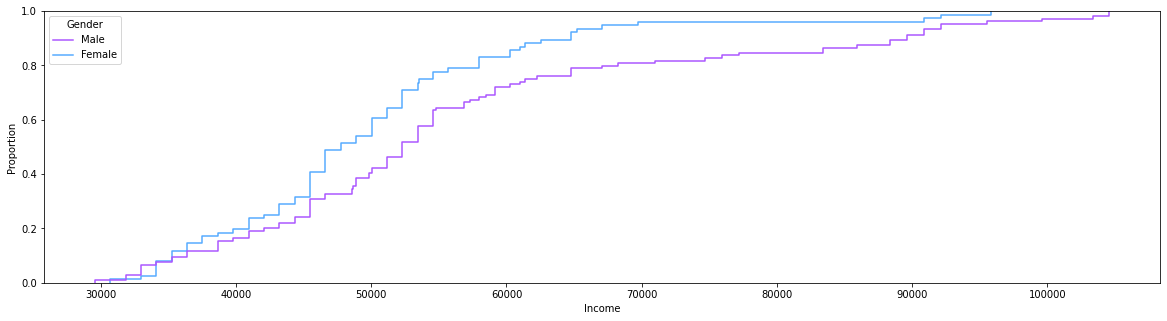

In [ ]:
sns.ecdfplot(data=aerofit, x='Income', complementary=False, palette='cool_r', hue='Gender')
plt.show()

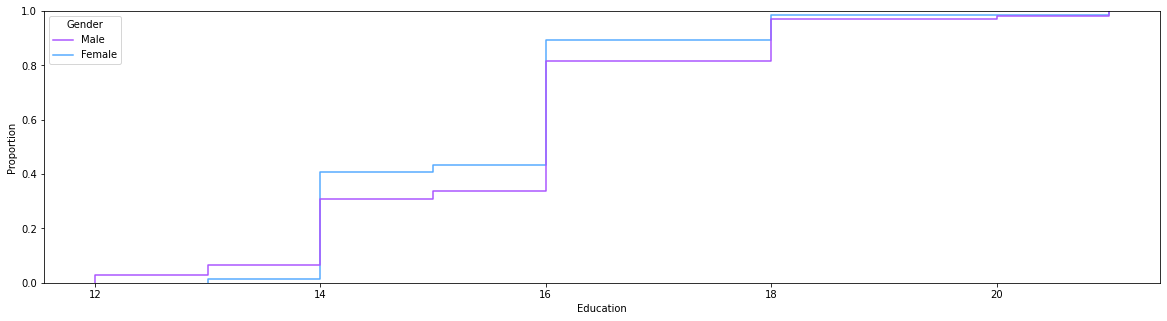

In [ ]:
sns.ecdfplot(data=aerofit, x='Education', complementary=False, palette='cool_r', hue='Gender')
plt.show()

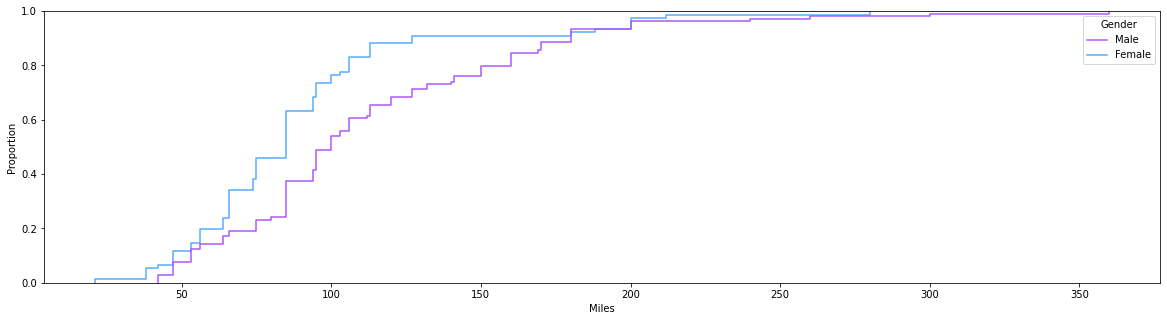

In [ ]:
sns.ecdfplot(data=aerofit, x='Miles', complementary=False, palette='cool_r', hue='Gender')
plt.show()

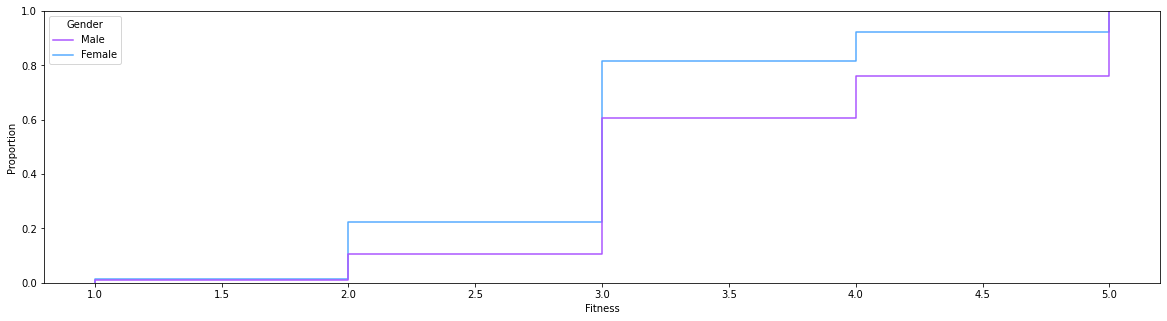

In [ ]:
sns.ecdfplot(data=aerofit, x='Fitness', complementary=False, palette='cool_r', hue='Gender')
plt.show()

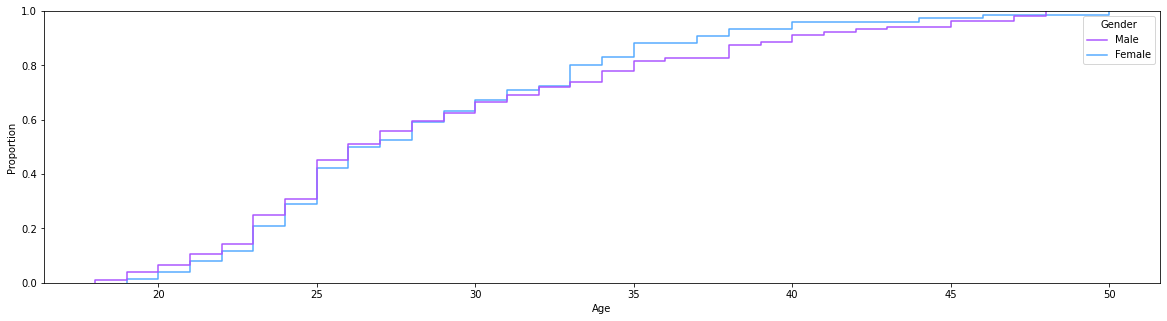

In [ ]:
sns.ecdfplot(data=aerofit, x='Age', complementary=False, palette='cool_r', hue='Gender')
plt.show()

#<font color="red">Conclusions</font>

1. KP281 is the most purchased product, followed by KP481 & KP781, respectively.
2. Overall, there are more Male buyers than Female.
3. There are more Parterned buyers than Single.
4. Average age of customers is 28, the maximum is 50 years, the minimum is 18 years, and the median is 26 years.
5. Average education age of customers is 15.5 years, the maximum is 21 years, the minimum is two years, and the median is 16 years.
7. Average treadmill planning usage is three times per week, the maximum usage is seven times per week, the minimum usage is two times per week, and the median usage is three times per week.
8. Average self-fitness rating of the user is 3, the maximum rating is 5, the minimum rating is 1, and the median rating is 3.
9. Average annual income of the customers is 53.7K$, the maximum is 104K dollars, the minimum is 29.5K dollars, and the median income is 50.5K dollars.
10. The Average distance travelled by the customer either by walking or running is 103 miles, the maximum is 360 miles, the minimum is 21 miles, and the median is 94 miles.
11. The relationship between education & income is moderately strong.
12. The relationship between fitness & distance travelled on the treadmill is strong. 
13. The relationship between usage & distance travelled on a treadmill is strong.
14. The age difference between 25th & 75th percentile is nine years only.
15. The education years difference between 25th & 75th percentile is two years only.
16. Most customers use the treadmill 3-4 times per week, while very few people walk/run 6-7 times per week.
17. The vast majority of people have rated themselves as moderately fit.
18. The Mean income of KP281 buyers is 46.4K dollars, while KP481 buyers have an income of 48.9K dollars, and KP781 buyers have an income of 75.4K dollars.
19. The Mean usage of KP281 and KP481 is the same i.e. 3, while KP781 is 4.
20. The Mean fitness of customers buying KP281 & KP481 is 3, while the KP781 fitness rating is 4.6.
21. KP781 is the most preferred treadmill of males, while the female gender prefers it very least.
22. Overall Male tend to use more treadmills.
23. Income distribution of both genders is roughly the same.
24. Male are fitter.
25. Distance travelled by both genders is roughly the same, while men have gone beyond 320 miles.
26. Partnerned status is fitter than singles. 




#<font color="red">Customer Profiling</font>

##<font color="red"><b>KP281</b></font>


1. KP281 is the most purchased treadmill model, contributing 44.44% of the sales.
2. Mean income of the customers buying KP281 is 46.4K dollars.
3. Mean planned usage of customers is 3.
4. Mean fitness rating of the customers is 3 (after rounding).
5. Both genders prefer KP281 model as their default choice of treadmill.
6. The age range of KP281 buyers is roughly between 22-33 years.
7. The income range of KP281 is roughly between 39K - 53K dollars.
8. The education range of KP281 is between 14 - 16 years.
9. The distance travelled on the treadmill is roughly between 75 - 80 miles.
10. The median/mean of fitness is 3 for KP281 model.
11. The single female customers bought KP281 treadmill slightly more than single male customers. The partnered male customers bought KP281 slightly more than single male customers.
12. The probability of buying KP281 given that the customer is male, P(Product=KP281 | Customer=Male) = 0.38.
13. The probability of buying KP281 given that the customer is female, P(Product=KP281 | Customer=Female) = 0.53.
14. The probability that customer is Male, given that he bought KP281, P(Customer=Male | Producty=KP281) = 0.50.
15. The probability that customer is Female, given that she bought KP281, P(Customer=Female | Product=KP281) = 0.50.
16. The probability that customer buys KP281 and gender is Male, P(KP281 & Male) = 0.22.
17. The probability that customer buys KP281 and gender is Female, P(KP281 & Female) = 0.22.
18. The probability of buying KP281 given that the marital status is single, P(Product=KP281 | MaritalStatus=Single) = 0.44.
19. The probability of buying KP281, given that marital status of customer is partnered, P(Product=KP281 | MaritalStatus=Single) = 0.45.
20. The probability of Marital Status being Single given that KP281 is purchased, P(MaritalStatus=Single | Product=KP281) = 0.40.
21. The probability of Marital Status being Parterned given that KP281 is purchased, P(MaritalStatus=Parterned | Product=KP281) = 0.60.
22. The probability of customer buying KP281 and their MartialStatus is Single, P(KP281 & Single) = 0.18.
23. The probability of customer buying KP281 and their MartialStatus is Partnered, P(KP281 & Partnered) = 0.27.
24. The probability of customer buying KP281 given fitness rating is 5, P(Product=KP281 | Fitness=5) = 0.06.
25. The probability of customer buying KP281 given fitness rating is 4, P(Product=KP281 | Fitness=4) = 0.38.
26. The probability of customer buying KP281 given fitness rating is 3, P(Product=KP281 | Fitness=3) = 0.56.
27. The probability of customer buying KP281 given fitness rating is 2, P(Product=KP281 | Fitness=2) = 0.54.
28. The probability of customer buying KP281 given fitness rating is 1, P(Product=KP281 | Fitness=1) = 0.5.
29. The probability of customer fitness rating is 5, given that they purchased KP281, P(Fitness=5 | Product=KP281) = 0.025.
30. The probability of customer fitness rating is 4, given that they purchased KP281, P(Fitness=4 | Product=KP281) = 0.11.
31. The probability of customer fitness rating is 3, given that they purchased KP281, P(Fitness=3 | Product=KP281) = 0.68.
32. The probability of customer fitness rating is 2, given that they purchased KP281, P(Fitness=2 | Product=KP281) = 0.17.
33. The probability of customer fitness rating is 1, given that they purchased KP281, P(Fitness=1 | Product=KP281) = 0.013.
34. The probability of buying KP281 and their fitness rating is 5, P(KP281 & Fitness=5) = 0.0011.
35. The probability of buying KP281 and their fitness rating is 4, P(KP281 & Fitness=4) = 0.05.
36. The probability of buying KP281 and their fitness rating is 3, P(KP281 & Fitness=3) = 0.3.
37. The probability of buying KP281 and their fitness rating is 2, P(KP281 & Fitness=2) = 0.078.
38. The probability of buying KP281 and their fitness rating is 1, P(KP281 Intersection Fitness=1) = 0.0056.


##<font color="red"><b>KP481</b></font>

1. KP481 is the second most product sold, contributing 33.33% of sales.
2. The mean income of KP481 buyers is 49K dollars.
3. The mean planned usage of KP481 is three times per week.
4. The mean fitness rating of KP481 is 3.
5. There are slightly more male buyers of the KP481 model.
6. More couples buy KP481 than single customers.
7. The age range of KP481 treadmill customers is roughly between 24-34 years.
8. The income range of KP481 treadmill customers is roughly between 45K - 53K dollars.
9. The education years range of KP481 is the same as KP281, i.e 14 - 16 years.
10. The distance travelled on the KP481 treadmill is roughly between 75 - 100 Miles. It is also the 2nd most distance travelled model.
11. The fitness mean/median of KP481 customers is the same as KP281, i.e 3.
12. The buyers of KP481 in Single & Partnered, Male & Female are same.
13. The probability of buying KP481, given that the customer is male, P(Product=KP481 | Customer=Male) = 0.3.
14. The probability of buying KP481, given that the customer is female, P(Product=KP481 | Customer=Female) = 0.38.
15. The probability that the customer is Male, given that he bought KP481, P(Customer=Male | Product=KP481) = 0.52.
16. The probability that the customer is Female, given that she bought KP481, P(Customer=Female | Product=KP481) = 0.48.
17. The probability that the customer buys KP481 and gender is Male, P(KP481 & Male) = 0.17.
18. The probability that the customer buys KP481 and gender is Female, P(KP481 & Female) = 0.16.
19. The probability of buying KP481, given that the marital status is single, P(Product=KP481 | MaritalStatus=Single) = 0.33.
20. The probability of buying KP481, given that the marital status is partnered, P(Product=KP481 | MaritalStatus=Single) = 0.34.
21. The probability of Marital Status being Single, given that KP481 is purchased, P(MaritalStatus=Single | Product=KP481) = 0.4.
22. The probability of Marital Status being partnered, given that KP481 is purchased, P(MaritalStatus=Partnered | Product=KP481) = 0.6.
23. The probability of customers buying KP481 and their marital status is Single, P(KP481 & Single) = 0.13.
24. The probability of customer buying KP481, given fitness rating is 5, P(Product=KP481 | Fitness=5) = 0.0 (impossible event).
25. The probability of a customer buying KP481, given a fitness rating, is 4, P(Product=KP481 | Fitness=4) = 0.33.
26. The probability of customers buying KP481, given fitness rating is 3, P(Product=KP481 | Fitness=3) = 0.4.
27. The probability of customers buying KP481, given fitness rating is 2, P(Product=KP481 | Fitness=2) = 0.46.
28. The probability of customer buying KP481 given fitness rating is 1, P(Product=KP481 | Fitness=1) = 0.5.
29. The probability of customer fitness rating is 5, given that they purchased KP481, P(Fitness=5 | Product=KP481) = 0.0 (impossible event).
30. The probability of customer fitness rating is 4, given that they purchased KP481, P(Fitness=4 | Product=KP481) = 0.13.
31. The probability of customer fitness rating is 3, given that they purchased KP481, P(Fitness=3 | Product=KP481) = 0.65.
32. The probability of customer fitness rating is 2, given that they purchased KP481, P(Fitness=2 | Product=KP481) = 0.2.
33. The probability of customer fitness rating is 1, given that they purchased KP481, P(Fitness=1 | Product=KP481) = 0.017.
34. The probability of buying KP481 and their fitness rating is 5, P(KP481 Intersection Fitness=5) = 0.0 (impossible event).
35. The probability of buying KP481 and their fitness rating is 4, P(KP481 Intersection Fitness=4) = 0.0044.
36. The probability of buying KP481 and their fitness rating is 3, P(KP481 Intersection Fitness=3) = 0.22.
37. The probability of buying KP481 and their fitness rating is 2, P(KP481 Intersection Fitness=2) = 0.067.
38. The probability of buying KP481 and their fitness rating is 1, P(KP481 Intersection Fitness=1) = 0.0056.

##<font color="red"><b>KP781</b></font>

1. KP781 is a rare bought treadmill model because it is expensive.
2. The mean income of KP781 buyers is 75.4K dollars.
3. The mean planned usage of KP781 customers is 4.
4. The mean fitness rating of KP781 buyers is 4.
KP781 is the most preferred among males, while very few females buy KP781.
5. KP781 is not popular among singles and partnered marital status.
6. The age range of KP781 buyers is roughly between 25-30 years. Few people have bought KP781. Maybe, their income is high.
7. The income range of KP781 is roughly between 59K - 92K Dollars. Here, the range is wide compared to KP281 & KP481.
8. The education years range is between 16 - 18 years. The correlation between Education & Income is high. That can be one of the reasons why customers have bought KP781.
9. The fitness range for KP781 is between 4 - 5. As KP781 has more features, people who are already fitter prefer the same.
10. Partnered Female bought KP781 treadmill compared to Partnered Male.
11. Single Male customers bought KP781 treadmills compared to single Females.
12. The probability of buying KP781 given that the customer is male, P(Product=KP781 | Customer=Male) = 0.32.
13. The probability of buying KP781 given that the customer is female, P(Product=KP781 | Customer=Female) = 0.092.
14. The probability that the customer is Male, given that he bought KP781, P(Customer=Male | Product=781) = 0.82.
15. The probability that the customer is Female, given that he bought KP781, P(Customer=Female | Product=KP781) = 0.17.
16. The probability that the customer buys KP781 and gender is Male, P(KP781 & Male) = 0.18.
17. The probability that the customer buys KP781 and gender is Female, P(KP781 & Female) = 0.039.
18. The probability of buying KP781, given that the marital status is single, P(Product=781 | MaritalStatus=Single) = 0.23.
19. The probability of buying KP781, given that the marital status is partnered, P(Product=KP781 | MaritalStatus=Single) = 0.21.
20. The probability of Marital Status being Single given that KP781 is purchased, P(MaritalStatus=Single | Product=KP781 ) = 0.42.
21. The probability of Marital Status being Partnered,  given that KP781, is purchased, P(MaritalStatus=Partnered | Product=KP781 ) = 0.57.
22. The probability of customers buying KP781 and their marital status is Single, P(KP781 & Single) = 0.094.
23. The probability of customers buying K7281 and their MartialStatus is Partnered, P(KP781 & Partnered) = 0.13.
24. The probability of customers buying KP781, given a fitness rating, is 5, P(Product=KP781 | Fitness=5) = 0.94.
25. The probability of a customer buying KP781, given fitness rating is 4, P(Product=KP781 | Fitness=4) = 0.29.
26. The probability of customers buying KP781, given fitness rating is 3, P(Product=KP781 | Fitness=3) = 0.04.
27. The probability of customer buying KP781, given fitness rating is 2, P(Product=KP781 | Fitness=2) = 0.0 (impossible event).
28. The probability of customer buying KP781, given fitness rating is 1, P(Product=KP781 | Fitness=1) = 0.0 (impossible event).
29. The probability of customer fitness rating is 5, given that they purchased KP781, P(Fitness=5 | Product=KP781) = 0.72.
30. The probability of customer fitness rating is 4, given that they purchased KP781, P(Fitness=4 | Product=KP781) = 0.17.
31. The probability of customer fitness rating is 3, given that they purchased KP781, P(Fitness=3 | Product=KP781) = 0.1.
32. The probability of customer fitness rating is 2, given that they purchased KP781, P(Fitness=2 | Product=KP781) = 0.0 (impossible event).
33. The probability of customer fitness rating is 1, given that they purchased KP781, P(Fitness=1 | Product=KP781) = 0.0 (impossible event).
34. The probability of buying KP781 and their fitness rating is 5, P(KP781 & Fitness=5) = 0.16.
35. The probability of buying KP781 and their fitness rating is 4, P(KP781 & Fitness=4) = 0.039.
36. The probability of buying KP781 and their fitness rating is 3, P(KP781 Intersection Fitness=3) = 0.022.
37. The probability of buying KP781 and their fitness rating is 2, P(KP781 Intersection Fitness=2) = 0.0 (impossible event).
38. The probability of buying KP781 and their fitness rating is 1, P(KP781 Intersection Fitness=1) = 0.0 (impossible event).





#<font color="red">Recommendations</font>

1. KP281 & KP481 treadmills are preferred by the customers whose annual income lies in the range of 39K - 53K Dollars. These models should promote as budget treadmills.
2. As KP781 provides more features and functionalities, the treadmill should be marketed for professionals and athletes.
3. We should endorse KP781 using recent winners of the Olympics or any sports event, for example, Neeraj Chopra, for better outreach.
4. We should run a marketing campaign on Women's Day and Mother's day to encourage more women to exercise.
5. We should research how to expand our market for customers beyond 50 years of age. We can recommend basic treadmill models (KP281/KP481) for starters.
6. As usage increases over time, we can recommend customers to upgrade their existing models to high-end treadmill models resulting in more revenue.
